In [358]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
os.environ['CUDA_VISIBLE_DEVICES']="1"

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model, Sequential
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler

In [2]:
!ls /data0/bpnachman/hadronization/

herwig_ang_QCD_untrimmed.csv  pythia_dip_W_untrimmed.csv
herwig_ang_W_untrimmed.csv    pythia_vin_QCD_untrimmed.csv
pythia_def_QCD_untrimmed.csv  pythia_vin_W_untrimmed.csv
pythia_def_W_untrimmed.csv    sherpa_def_QCD_untrimmed.csv
pythia_dip_QCD_untrimmed.csv  sherpa_def_W_untrimmed.csv


In [3]:
'''
They are all csv files.
This is the Index for these files.
Index(['GEN', 'SHO', 'PRO', 'MJ_0', 'PTJ_0', 't21_0', 'D21_0', 'D22_0',
       'C21_0', 'C22_0', 'MJ', 'PTJ', 't21', 'D21', 'D22', 'C21', 'C22',
       'eventindex', 'index']
The index which contains “_0” means high-level features for untrimmed jet.
The  index without “_0” means high-level features for trimmed jet.
“ GEN” stands for generator.
“SHO” stands for showering method.
“PRO” stands for process: W or QCD.
"t21” is N-subjetness .
“D21", “D22”,” C21" and “C22" are energy power functions. (http://arxiv.org/abs/1603.09349)
'''

myfile = open("/data0/bpnachman/hadronization/pythia_def_QCD_untrimmed.csv")
events_pythia_QCD = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_pythia_QCD+=[event]
    
myfile = open("/data0/bpnachman/hadronization/pythia_def_W_untrimmed.csv")
events_pythia_W = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_pythia_W+=[event]
    
myfile = open("/data0/bpnachman/hadronization/herwig_ang_QCD_untrimmed.csv")
events_herwig_QCD = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_herwig_QCD+=[event]
    
myfile = open("/data0/bpnachman/hadronization/herwig_ang_W_untrimmed.csv")
events_herwig_W = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_herwig_W+=[event]
    
myfile = open("/data0/bpnachman/hadronization/sherpa_def_QCD_untrimmed.csv")
events_sherpa_QCD = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_sherpa_QCD+=[event]
    
myfile = open("/data0/bpnachman/hadronization/sherpa_def_W_untrimmed.csv")
events_sherpa_W = []
for line in myfile:
    if "GEN" in line:
        continue
    event = [float(line.split(",")[3]),float(line.split(",")[4]),float(line.split(",")[5]),float(line.split(",")[6]),float(line.split(",")[7]),float(line.split(",")[8]),float(line.split(",")[9])]
    events_sherpa_W+=[event]

In [4]:
X = np.concatenate([events_pythia_W,events_pythia_QCD])
Y = np.concatenate([np.ones(len(events_pythia_W)),np.zeros(len(events_pythia_QCD))])
W = np.concatenate([np.ones(len(events_pythia_W)),np.ones(len(events_pythia_QCD))])

for i in range(2,7):
    X[:,i] = np.clip(X[:,i],-10,10)

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test, W_train, W_test = train_test_split(X,Y,W, test_size=0.5)

Y_train_2 = np.stack((Y_train, W_train), axis=1)
Y_test_2 = np.stack((Y_test, W_test), axis=1)

X_h = np.concatenate([events_herwig_W,events_herwig_QCD])
Y_h = np.concatenate([np.ones(len(events_herwig_W)),np.zeros(len(events_herwig_QCD))])
W_h = np.concatenate([np.ones(len(events_herwig_W)),np.ones(len(events_herwig_QCD))])

for i in range(2,7):
    X_h[:,i] = np.clip(X_h[:,i],-10,10)
X_h = scaler.transform(X_h)

X_train_h, X_test_h, Y_train_h, Y_test_h, W_train_h, W_test_h = train_test_split(X_h,Y_h,W_h, test_size=0.5)

Y_train_2_h = np.stack((Y_train_h, W_train_h), axis=1)
Y_test_2_h = np.stack((Y_test_h, W_test_h), axis=1)

X_s = np.concatenate([events_sherpa_W,events_sherpa_QCD])
Y_s = np.concatenate([np.ones(len(events_sherpa_W)),np.zeros(len(events_sherpa_QCD))])
W_s = np.concatenate([np.ones(len(events_sherpa_W)),np.ones(len(events_sherpa_QCD))])

for i in range(2,7):
    X_s[:,i] = np.clip(X_s[:,i],-10,10)
X_s = scaler.transform(X_s)

X_train_s, X_test_s, Y_train_s, Y_test_s, W_train_s, W_test_s = train_test_split(X_s,Y_s,W_s, test_size=0.5)

Y_train_2_s = np.stack((Y_train_s, W_train_s), axis=1)
Y_test_2_s = np.stack((Y_test_s, W_test_s), axis=1)

for i in range(7):
    X_h[:,i] = np.clip(X_h[:,i],np.min(X[:,i]),np.max(X[:,i]))

#For adversary
X_a = np.concatenate([X,X_h])
Y_a = np.concatenate([Y,Y_h])
Z_a = np.concatenate([np.zeros(len(X)),np.ones(len(X_h))])

X_train_a, X_test_a, Y_train_a, Y_test_a, Z_train_a, Z_test_a = train_test_split(X_a,Y_a,Z_a, test_size=0.5)

In [5]:
X_train[0]

array([-0.68308313,  0.52628418, -1.26445775, -0.65998501, -0.80780016,
       -1.95842984, -1.53310602])

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.8000e+01,
        1.0663e+04, 5.0301e+04, 7.6304e+04, 8.4890e+04, 8.8904e+04,
        8.8522e+04, 7.2552e+04, 3.6709e+04, 6.6500e+02, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <BarContainer object of 19 artists>)

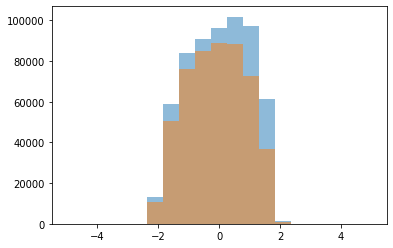

In [6]:
n,b,_=plt.hist(X_train[:,2],alpha=0.5,bins=np.linspace(-5,5,20))
plt.hist(X_train_h[:,2],bins=b,alpha=0.5)

In [7]:
for i in range(7):
    #X_train_h[:,i] = np.clip(X_train_h[:,i],np.min(X_train[:,i]),np.max(X_train[:,i]))
    print(i,np.std(X_train[:,i]))
    print(i,np.std(X_train_h[:,i]))
    print(i,np.std(X_train_s[:,i]))

0 1.0000406879133104
0 0.9624536829262595
0 1.0292085555416683
1 1.0006393087813514
1 0.9918944521000989
1 1.0860321095371086
2 1.001125897060339
2 0.9568244491362533
2 0.9999145616603814
3 1.000216078410456
3 0.9751449280586109
3 1.0537030014451858
4 1.000449601726244
4 0.9952718315340566
4 1.023985067209683
5 0.9967767648667962
5 1.0003775335768912
5 1.0512561762746229
6 0.9921370280846085
6 1.010235379728861
6 0.9876647648232103


In [210]:
def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    
    # Clip the prediction value to prevent NaN's and Inf's
    epsilon = K.epsilon()
    y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
    t_loss = -weights * ((y_true) * K.log(y_pred) +
                         (1 - y_true) * K.log(1 - y_pred))
    return K.mean(t_loss)

def weighted_mse(y_true, y_pred):
    weights = tf.gather(y_true, [1], axis=1) # event weights
    y_true = tf.gather(y_true, [0], axis=1) # actual y_true for loss
    return K.mean(weights*(y_true - y_pred)**2)

In [9]:
model = Sequential()
model.add(Dense(50, input_dim=7, activation='relu')) 
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=weighted_binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [10]:
hist = model.fit(X_train, Y_train_2, epochs=20, batch_size=100,verbose = 1)

Epoch 1/20
6045/6045 [==============================] - 18s 3ms/step - loss: 0.4349 - accuracy: 0.5449
Epoch 2/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4064 - accuracy: 0.5540
Epoch 3/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4055 - accuracy: 0.5532
Epoch 4/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4028 - accuracy: 0.5539
Epoch 5/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4047 - accuracy: 0.5536
Epoch 6/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4017 - accuracy: 0.5542
Epoch 7/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4020 - accuracy: 0.5550
Epoch 8/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4010 - accuracy: 0.5540
Epoch 9/20
6045/6045 [==============================] - 17s 3ms/step - loss: 0.4021 - accuracy: 0.5547
Epoch 10/20
6045/6045 [==============================] - 17s 3ms/step - l

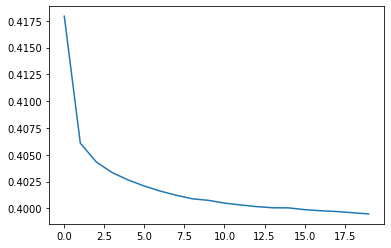

In [11]:
plt.plot(hist.history['loss'])

In [12]:
scores = model.predict(X_test,batch_size=1000)
scores_h = model.predict(X_test_h,batch_size=1000)
scores_s = model.predict(X_test_s,batch_size=1000)

In [13]:
fpr, tpr, _ = roc_curve(Y_test, scores)
fpr_h, tpr_h, _ = roc_curve(Y_test_h, scores_h)
fpr_s, tpr_s, _ = roc_curve(Y_test_s, scores_s)

<ipython-input-14-e7a4b72077c7>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/fpr)
<ipython-input-14-e7a4b72077c7>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_h,1/fpr_h)
<ipython-input-14-e7a4b72077c7>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_s,1/fpr_s)
<ipython-input-14-e7a4b72077c7>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/tpr,ls=":")


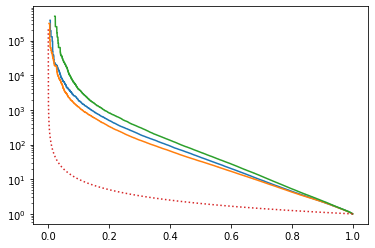

In [14]:
plt.plot(tpr,1/fpr)
plt.plot(tpr_h,1/fpr_h)
plt.plot(tpr_s,1/fpr_s)
plt.plot(tpr,1/tpr,ls=":")
plt.yscale("log")

<ipython-input-15-6f23263f078d>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/fpr)
<ipython-input-15-6f23263f078d>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_h,1/fpr_h)
<ipython-input-15-6f23263f078d>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_s,1/fpr_s)
<ipython-input-15-6f23263f078d>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/tpr,ls=":")


(0.0, 1000.0)

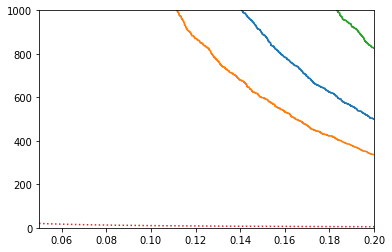

In [15]:
plt.plot(tpr,1/fpr)
plt.plot(tpr_h,1/fpr_h)
plt.plot(tpr_s,1/fpr_s)
plt.plot(tpr,1/tpr,ls=":")
plt.xlim([0.05,0.2])
plt.ylim([0,1000])

In [49]:
@tf.custom_gradient
#def grad_reverse(x, scale=0.2):
def grad_reverse(x, scale=10.):
    y = tf.identity(x)
    def custom_grad(dy):
        return -dy * scale
    return y, custom_grad

class GradReverse(tf.keras.layers.Layer):
    def __init__(self):
        super(GradReverse, self).__init__()

    def call(self, x):
        return grad_reverse(x)

In [17]:
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

In [83]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda = 10.

inputs = Input(shape=(7,))
inputs_label = Input(shape=(1,))

Dx = Dense(n_nodes_inv, activation="relu")(inputs)
for i in range(n_hidden_inv -1):
    Dx = Dense(n_nodes_inv, activation='relu')(Dx)
Dx = Dense(1, activation="sigmoid", name="Clf")(Dx)
inv_model = Model(inputs=inputs, outputs=Dx)

GRx = GradReverse()(Dx)
GRx_con = tf.keras.layers.concatenate([GRx,inputs_label])
Rx = Dense(n_nodes_inv_R, activation="relu")(GRx_con)
for i in range(n_hidden_inv_R -1):
    Rx = Dense(n_nodes_inv_R, activation='relu')(Rx)
#Rx = Dense(1, activation="sigmoid")(Rx)
Rx = Dense(1, activation="sigmoid", name="Adv")(Rx)
GR = Model(inputs=[inputs,inputs_label], outputs=[Dx, Rx])

GR.compile(loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1,hp_lambda], optimizer="adam") #rmsprop

In [66]:
#GR.compile(loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1e-5,1.], optimizer="adam")

In [72]:
#inv_model_saved = tf.keras.models.clone_model(inv_model)

In [84]:
n_epochs = 5
GRhist = GR.fit(x=[X_train_a,Y_train_a], y=[Y_train_a, Z_train_a], epochs=n_epochs, batch_size=200)

Epoch 1/5
5570/5570 [==============================] - 27s 5ms/step - loss: 7.3612 - Clf_loss: 0.4698 - Adv_loss: 0.6891
Epoch 2/5
5570/5570 [==============================] - 27s 5ms/step - loss: 7.3274 - Clf_loss: 0.4383 - Adv_loss: 0.6889
Epoch 3/5
5570/5570 [==============================] - 27s 5ms/step - loss: 7.3245 - Clf_loss: 0.4359 - Adv_loss: 0.6889
Epoch 4/5
5570/5570 [==============================] - 27s 5ms/step - loss: 7.3205 - Clf_loss: 0.4325 - Adv_loss: 0.6888
Epoch 5/5
5570/5570 [==============================] - 27s 5ms/step - loss: 7.3196 - Clf_loss: 0.4316 - Adv_loss: 0.6888


In [564]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda = 0.

inputs_lam0 = Input(shape=(7,))
inputs_label_lam0 = Input(shape=(1,))

Dx_lam0 = Dense(n_nodes_inv, activation="relu")(inputs_lam0)
for i in range(n_hidden_inv -1):
    Dx_lam0 = Dense(n_nodes_inv, activation='relu')(Dx_lam0)
Dx_lam0 = Dense(1, activation="sigmoid", name="Clf")(Dx_lam0)
inv_model_lam0 = Model(inputs=inputs_lam0, outputs=Dx_lam0)

GRx_lam0 = GradReverse()(Dx_lam0)
GRx_con_lam0 = tf.keras.layers.concatenate([GRx_lam0,inputs_label_lam0])
Rx_lam0 = Dense(n_nodes_inv_R, activation="relu")(GRx_con_lam0)
for i in range(n_hidden_inv_R -1):
    Rx_lam0 = Dense(n_nodes_inv_R, activation='relu')(Rx_lam0)
#Rx = Dense(1, activation="sigmoid")(Rx)
Rx_lam0 = Dense(1, activation="sigmoid", name="Adv")(Rx_lam0)
GR_lam0 = Model(inputs=[inputs_lam0,inputs_label_lam0], outputs=[Dx_lam0, Rx_lam0])

GR_lam0.compile(loss=["binary_crossentropy", "binary_crossentropy"], loss_weights=[1,hp_lambda], optimizer="adam") #rmsprop

In [565]:
n_epochs = 5
GRhist_lam0 = GR_lam0.fit(x=[X_train_a,Y_train_a], y=[Y_train_a, Z_train_a], epochs=n_epochs, batch_size=200)

Epoch 1/5
5570/5570 [==============================] - 28s 5ms/step - loss: 0.4437 - Clf_loss: 0.4437 - Adv_loss: 0.6938
Epoch 2/5
5570/5570 [==============================] - 27s 5ms/step - loss: 0.4166 - Clf_loss: 0.4166 - Adv_loss: 0.6938
Epoch 3/5
5570/5570 [==============================] - 27s 5ms/step - loss: 0.4165 - Clf_loss: 0.4165 - Adv_loss: 0.6938
Epoch 4/5
5570/5570 [==============================] - 27s 5ms/step - loss: 0.4147 - Clf_loss: 0.4147 - Adv_loss: 0.6938
Epoch 5/5
5570/5570 [==============================] - 27s 5ms/step - loss: 0.4140 - Clf_loss: 0.4140 - Adv_loss: 0.6937


In [19]:
#plt.hist(preds_ap[Y_test==1],alpha=0.5)
#plt.hist(preds_ap[Y_test==0],alpha=0.5)
#plt.hist(preds_ah[Y_test_h==0],alpha=0.5,density=True)
#plt.hist(preds_ap[Y_test==0],alpha=0.5,density=True)

In [20]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [21]:
fprs = []
tprs = []
losses_total = []
losses_clf = []
losses_adv = []
mymodels = {}
for i in range(50):
    n_epochs = 1
    GRhist = GR.fit(x=X_train_a, y=[Y_train_a, Z_train_a], epochs=n_epochs, batch_size=200)
    mymodels[i] = tf.keras.models.clone_model(inv_model)
    
    preds_train = inv_model.predict(X_train_a,batch_size=1000)
    model_test = Sequential()
    model_test.add(Dense(50, input_dim=1, activation='relu')) 
    model_test.add(Dense(50, activation='relu'))
    model_test.add(Dense(1, activation='sigmoid'))
    model_test.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])
    hist_test = model_test.fit(preds_train, Z_train_a, epochs=5, batch_size=500,verbose = 1)
    
    preds_test = model_test.predict(inv_model.predict(X_test_a,batch_size=1000),batch_size=1000)
    fpr_test, tpr_test, _ = roc_curve(Z_test_a, preds_test, drop_intermediate=False)
    
    tpr_i = find_nearest(tpr_test,0.1)
    print(i,tpr_test[tpr_i],fpr_test[tpr_i])
    tprs += [tpr_test[tpr_i]]
    fprs += [fpr_test[tpr_i]]
    
    losses_total += [GRhist.history['loss']]
    losses_clf += [GRhist.history['Clf_loss']]
    losses_adv += [GRhist.history['Adv_loss']]

5570/5570 [==============================] - 26s 5ms/step - loss: 69.5136 - Clf_loss: 0.5551 - Adv_loss: 0.6896
Epoch 1/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6896 - accuracy: 0.5423
Epoch 2/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6895 - accuracy: 0.5422
Epoch 3/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6894 - accuracy: 0.5430
Epoch 4/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6895 - accuracy: 0.5422
Epoch 5/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6895 - accuracy: 0.5419
0 0.09999901921360548 0.0911582777039363
5570/5570 [==============================] - 25s 5ms/step - loss: 69.4276 - Clf_loss: 0.4773 - Adv_loss: 0.6895
Epoch 1/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6897 - accuracy: 0.5415
Epoch 2/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6895 - accuracy: 0.5429
Epoch 3/5
2228/2228 [=======

2228/2228 [==============================] - 6s 3ms/step - loss: 0.6893 - accuracy: 0.5432
24 0.10000098078639454 0.0935086990417895
5570/5570 [==============================] - 25s 4ms/step - loss: 69.4011 - Clf_loss: 0.4524 - Adv_loss: 0.6895
Epoch 1/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6895 - accuracy: 0.5432
Epoch 2/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6894 - accuracy: 0.5433
Epoch 3/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6893 - accuracy: 0.5435
Epoch 4/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6894 - accuracy: 0.5432
Epoch 5/5
2228/2228 [==============================] - 6s 3ms/step - loss: 0.6894 - accuracy: 0.5428
25 0.09999901921360548 0.09354180356767476
5570/5570 [==============================] - 25s 4ms/step - loss: 69.4029 - Clf_loss: 0.4544 - Adv_loss: 0.6895
Epoch 1/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6897 - accuracy: 0

2228/2228 [==============================] - 7s 3ms/step - loss: 0.6895 - accuracy: 0.5430
Epoch 4/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6894 - accuracy: 0.5435
Epoch 5/5
2228/2228 [==============================] - 7s 3ms/step - loss: 0.6895 - accuracy: 0.5428
49 0.0999970576408164 0.10083307539390247


In [22]:
#inv_model = tf.keras.models.clone_model(mymodels[np.argmax(fprs)])
inv_model = tf.keras.models.clone_model(mymodels[48])

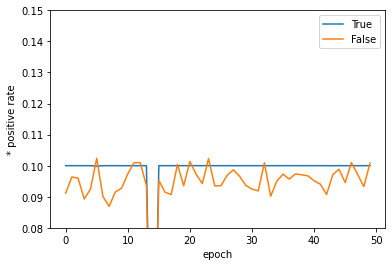

In [48]:
#plt.plot(GRhist.history['loss'])
plt.plot(tprs,label="True")
plt.plot(fprs,label="False")
plt.xlabel("epoch")
plt.ylabel("* positive rate")
plt.legend(frameon=True)

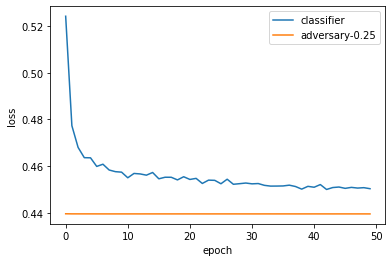

In [24]:
plt.plot(losses_clf,label="classifier")
plt.plot(np.array(losses_adv)-0.25,label="adversary-0.25")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(frameon=True)

In [85]:
preds_ap = inv_model.predict(X_test,batch_size=1000)
preds_ah = inv_model.predict(X_test_h,batch_size=1000)
preds_as = inv_model.predict(X_test_s,batch_size=1000)

In [566]:
preds_ap_lam0 = inv_model_lam0.predict(X_test,batch_size=1000)
preds_ah_lam0 = inv_model_lam0.predict(X_test_h,batch_size=1000)
preds_as_lam0 = inv_model_lam0.predict(X_test_s,batch_size=1000)

Text(0.5, 0, 'independent adv training output')

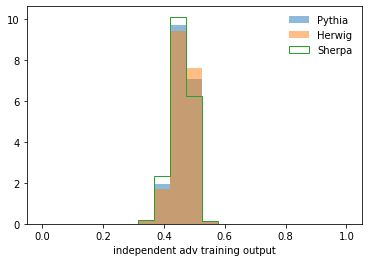

In [26]:
plt.hist(preds_ap[Y_test==1],alpha=0.5,label="Pythia",bins=np.linspace(0.,1,20),density=True)
plt.hist(preds_ah[Y_test_h==1],alpha=0.5,label="Herwig",bins=np.linspace(0.,1,20),density=True)
plt.hist(preds_as[Y_test_s==1],histtype="step",label="Sherpa",bins=np.linspace(0.,1,20),density=True)
plt.legend(frameon=False)
plt.xlabel("independent adv training output")

Text(0.5, 0, 'independent adv training output')

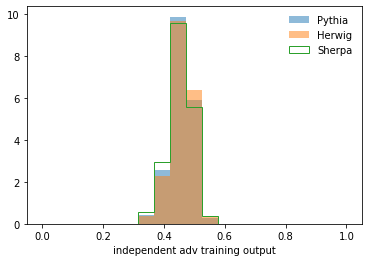

In [27]:
plt.hist(preds_ap[Y_test==0],alpha=0.5,label="Pythia",bins=np.linspace(0.,1.,20),density=True)
plt.hist(preds_ah[Y_test_h==0],alpha=0.5,label="Herwig",bins=np.linspace(0.,1.,20),density=True)
plt.hist(preds_as[Y_test_s==0],histtype="step",label="Sherpa",bins=np.linspace(0.,1.,20),density=True)
plt.legend(frameon=False)
plt.xlabel("independent adv training output")

(array([1.61332723, 4.99125095, 3.83953001, 2.2966135 , 1.6756036 ,
        1.05616086, 0.72683121, 0.52668117, 0.4075016 , 0.33455355,
        0.27470257, 0.22873224, 0.2047023 , 0.17817234, 0.15757525,
        0.14776177, 0.1319035 , 0.12384377, 0.08455257]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 [<matplotlib.patches.Polygon at 0x7ff5e06240a0>])

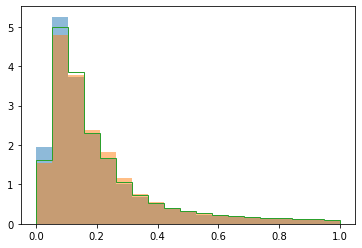

In [28]:
plt.hist(scores[Y_test==0],alpha=0.5,label="Pythia",bins=np.linspace(0.,1.,20),density=True)
plt.hist(scores_h[Y_test_h==0],alpha=0.5,label="Herwig",bins=np.linspace(0.,1.,20),density=True)
plt.hist(scores_s[Y_test_s==0],histtype="step",label="Sherpa",bins=np.linspace(0.,1.,20),density=True)

(array([0.1385747 , 0.75026898, 0.83668979, 0.74450322, 0.75714857,
        0.61058044, 0.51780419, 0.47836117, 0.44291488, 0.43878712,
        0.4485496 , 0.48569941, 0.50699339, 0.57244783, 0.70060485,
        0.87259473, 1.21447784, 2.08274825, 6.40025104]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 [<matplotlib.patches.Polygon at 0x7ff5e054d520>])

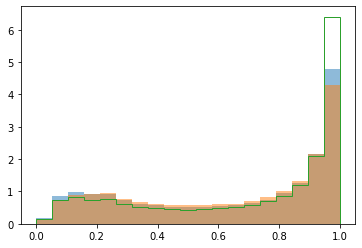

In [29]:
plt.hist(scores[Y_test==1],alpha=0.5,label="Pythia",bins=np.linspace(0.,1.,20),density=True)
plt.hist(scores_h[Y_test_h==1],alpha=0.5,label="Herwig",bins=np.linspace(0.,1.,20),density=True)
plt.hist(scores_s[Y_test_s==1],histtype="step",label="Sherpa",bins=np.linspace(0.,1.,20),density=True)

In [30]:
len(scores[(Y_test==1)*(scores[:,0] > 0.5)])/len(scores[Y_test==1])

0.6544090073874077

In [31]:
len(preds_ap[(Y_test==1)*(preds_ap[:,0] > 0.5)])/len(preds_ap[Y_test==1])

0.11563917951025612

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 8.90613867e-05, 1.80260247e-01, 1.95071155e+00,
        9.69931938e+00, 7.03976825e+00, 1.29228072e-01, 5.34368320e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.90613867e-05,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 [<matplotlib.patches.Polygon at 0x7ff5e047bd90>])

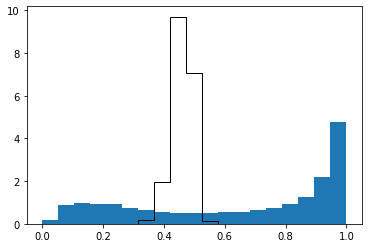

In [32]:
plt.hist(scores[Y_test==1],bins=np.linspace(0.,1.,20),density=True)
plt.hist(preds_ap[Y_test==1],bins=np.linspace(0.,1.,20),density=True,histtype="step",color="black")

In [86]:
fpr_ap, tpr_ap, _ = roc_curve(Y_test, preds_ap)
fpr_ah, tpr_ah, _ = roc_curve(Y_test_h, preds_ah)
fpr_as, tpr_as, _ = roc_curve(Y_test_s, preds_as)

In [567]:
fpr_ap_lam0, tpr_ap_lam0, _ = roc_curve(Y_test, preds_ap_lam0)
fpr_ah_lam0, tpr_ah_lam0, _ = roc_curve(Y_test_h, preds_ah_lam0)
fpr_as_lam0, tpr_as_lam0, _ = roc_curve(Y_test_s, preds_as_lam0)

In [494]:
from matplotlib.lines import Line2D

<ipython-input-636-c2be47887268>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/fpr,label="Pythia 8",color="black")
<ipython-input-636-c2be47887268>:12: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_h,1/fpr_h,label="Herwig 7",color="blue")
<ipython-input-636-c2be47887268>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_s,1/fpr_s,label="Sherpa 2",color="red")
<ipython-input-636-c2be47887268>:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ap,1./fpr_ap,color="black",ls=":")
<ipython-input-636-c2be47887268>:15: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ah,1./fpr_ah,color="blue",ls=":")
<ipython-input-636-c2be47887268>:16: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_as,1/fpr_as,color="red",ls=":")
<ipython-input-636-c2be47887268>:29: RuntimeWarning: divide by zero encountered in true_divide
  p8_nom = np.interp(np.l

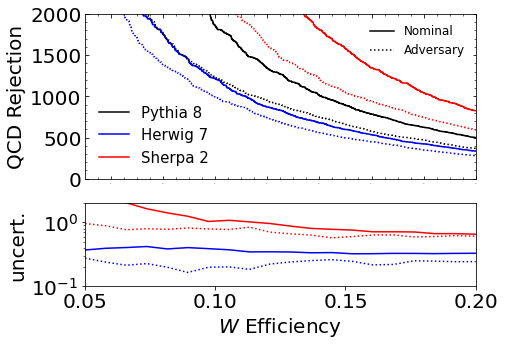

In [636]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)

plt.plot(tpr,1/fpr,label="Pythia 8",color="black")
plt.plot(tpr_h,1/fpr_h,label="Herwig 7",color="blue")
plt.plot(tpr_s,1/fpr_s,label="Sherpa 2",color="red")
plt.plot(tpr_ap,1./fpr_ap,color="black",ls=":")
plt.plot(tpr_ah,1./fpr_ah,color="blue",ls=":")
plt.plot(tpr_as,1/fpr_as,color="red",ls=":")

plt.ylabel("QCD Rejection",fontsize=20)
#plt.plot(tpr,1/tpr,ls=":")
plt.xlim([0.05,0.2])
plt.ylim([0,2000])
legend1 = plt.legend(frameon=False,loc="lower left",fontsize=15)
line = Line2D([0], [0], label='Nominal', color='k')
line2 = Line2D([0], [0], label='Adversary', color='k',ls=":")
plt.legend(handles=[line,line2],loc="upper right",fontsize=12,frameon=False)
plt.gca().add_artist(legend1)
plt.locator_params(axis='y', nbins=4)

p8_nom = np.interp(np.linspace(0.05,0.2,20),tpr,1/fpr)
p8_adv = np.interp(np.linspace(0.05,0.2,20),tpr_ap,1/fpr_ap)

h7_nom = np.interp(np.linspace(0.05,0.2,20),tpr_h,1/fpr_h)
h7_adv = np.interp(np.linspace(0.05,0.2,20),tpr_ah,1/fpr_ah)

s2_nom = np.interp(np.linspace(0.05,0.2,20),tpr_s,1/fpr_s)
s2_adv = np.interp(np.linspace(0.05,0.2,20),tpr_as,1/fpr_as)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.linspace(0.05,0.2,20),abs(h7_nom-p8_nom)/p8_nom,color='blue')
plt.plot(np.linspace(0.05,0.2,20),abs(s2_nom-p8_nom)/p8_nom,color='red')
plt.plot(np.linspace(0.05,0.2,20),abs(h7_adv-p8_adv)/p8_adv,color='blue',ls=":")
plt.plot(np.linspace(0.05,0.2,20),abs(s2_adv-p8_adv)/p8_adv,color='red',ls=":")
plt.xlabel("$W$ Efficiency",fontsize=20)
plt.ylabel("uncert.",fontsize=20)
plt.xlim([0.05,0.2])
plt.ylim([1e-1,2])
#plt.axhline(1,ls="-",alpha=0.4,color="black")
plt.locator_params(axis='x', nbins=4)
#plt.axhline(1.1,ls=":")
#plt.axhline(0.9,ls=":")
plt.yscale("log")

fig.savefig('ROC_hadronization.pdf',bbox_inches='tight')

<ipython-input-635-577b5cb46520>:11: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/fpr,label="Pythia 8",color="black")
<ipython-input-635-577b5cb46520>:12: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_h,1/fpr_h,label="Herwig 7",color="blue")
<ipython-input-635-577b5cb46520>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_s,1/fpr_s,label="Sherpa 2",color="red")
<ipython-input-635-577b5cb46520>:18: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ap_lam0,1./fpr_ap_lam0,color="black",ls="--")
<ipython-input-635-577b5cb46520>:19: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ah_lam0,1./fpr_ah_lam0,color="blue",ls="--")
<ipython-input-635-577b5cb46520>:20: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_as_lam0,1/fpr_as_lam0,color="red",ls="--")
<ipython-input-635-577b5cb46520>:33: RuntimeWarning: divide by zero encountered in true

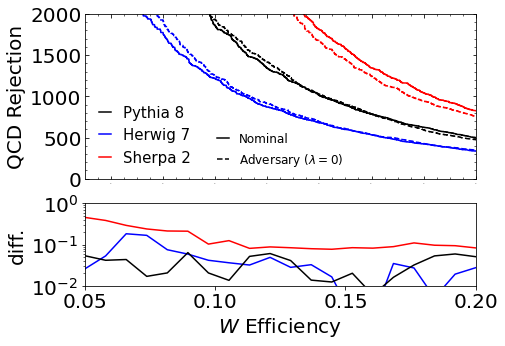

In [635]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)

plt.plot(tpr,1/fpr,label="Pythia 8",color="black")
plt.plot(tpr_h,1/fpr_h,label="Herwig 7",color="blue")
plt.plot(tpr_s,1/fpr_s,label="Sherpa 2",color="red")
#plt.plot(tpr_ap,1./fpr_ap,color="black",ls=":")
#plt.plot(tpr_ah,1./fpr_ah,color="blue",ls=":")
#plt.plot(tpr_as,1/fpr_as,color="red",ls=":")

plt.plot(tpr_ap_lam0,1./fpr_ap_lam0,color="black",ls="--")
plt.plot(tpr_ah_lam0,1./fpr_ah_lam0,color="blue",ls="--")
plt.plot(tpr_as_lam0,1/fpr_as_lam0,color="red",ls="--")

plt.ylabel("QCD Rejection",fontsize=20)
#plt.plot(tpr,1/tpr,ls=":")
plt.xlim([0.05,0.2])
plt.ylim([0,2000])
legend1 = plt.legend(frameon=False,loc="lower left",fontsize=15,handlelength=0.8)
line = Line2D([0], [0], label='Nominal', color='k')
line3 = Line2D([0], [0], label='Adversary ($\lambda=0$)', color='k',ls="--")
plt.legend(handles=[line,line3],loc="lower center",fontsize=12,frameon=False,handlelength=1.)
plt.gca().add_artist(legend1)
plt.locator_params(axis='y', nbins=4)

p8_nom = np.interp(np.linspace(0.05,0.2,20),tpr,1/fpr)
p8_adv_lam0 = np.interp(np.linspace(0.05,0.2,20),tpr_ap_lam0,1/fpr_ap_lam0)

h7_nom = np.interp(np.linspace(0.05,0.2,20),tpr_h,1/fpr_h)
h7_adv_lam0 = np.interp(np.linspace(0.05,0.2,20),tpr_ah_lam0,1/fpr_ah_lam0)

s2_nom = np.interp(np.linspace(0.05,0.2,20),tpr_s,1/fpr_s)
s2_adv_lam0 = np.interp(np.linspace(0.05,0.2,20),tpr_as_lam0,1/fpr_as_lam0)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.linspace(0.05,0.2,20),abs(h7_nom-h7_adv_lam0)/h7_nom,color='blue')
plt.plot(np.linspace(0.05,0.2,20),abs(s2_nom-s2_adv_lam0)/s2_nom,color='red')
plt.plot(np.linspace(0.05,0.2,20),abs(p8_nom-p8_adv_lam0)/p8_nom,color='black')
plt.xlabel("$W$ Efficiency",fontsize=20)
plt.ylabel("diff.",fontsize=20)
plt.xlim([0.05,0.2])
plt.ylim([1e-2,1])
#plt.axhline(1,ls="-",alpha=0.4,color="black")
plt.locator_params(axis='x', nbins=4)
#plt.axhline(1.1,ls=":")
#plt.axhline(0.9,ls=":")
plt.yscale("log")

fig.savefig('ROC_hadronization_app.pdf',bbox_inches='tight')

<ipython-input-45-2c122ed35bc1>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr,1/fpr,label="pythia",color="black")
<ipython-input-45-2c122ed35bc1>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_h,1/fpr_h,label="herwig",color="blue")
<ipython-input-45-2c122ed35bc1>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_s,1/fpr_s,label="sherpa",color="red")
<ipython-input-45-2c122ed35bc1>:4: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ap,1./fpr_ap,label="pythia adversary",color="black",ls=":")
<ipython-input-45-2c122ed35bc1>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_ah,1./fpr_ah,label="herwig adversary",color="blue",ls=":")
<ipython-input-45-2c122ed35bc1>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_as,1/fpr_as,label="sherpa adversary",color="red",ls=":")
<ipython-input-45-2c122ed35bc1>:7: RuntimeWarning: divide by ze

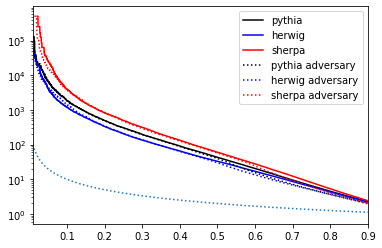

In [45]:
plt.plot(tpr,1/fpr,label="pythia",color="black")
plt.plot(tpr_h,1/fpr_h,label="herwig",color="blue")
plt.plot(tpr_s,1/fpr_s,label="sherpa",color="red")
plt.plot(tpr_ap,1./fpr_ap,label="pythia adversary",color="black",ls=":")
plt.plot(tpr_ah,1./fpr_ah,label="herwig adversary",color="blue",ls=":")
plt.plot(tpr_as,1/fpr_as,label="sherpa adversary",color="red",ls=":")
plt.plot(tpr,1/tpr,ls=":")
plt.xlim([0.01,0.9])
#plt.ylim([0,2000])
plt.legend()
plt.yscale("log")

In [486]:
np.shape(X)

(1208806, 7)

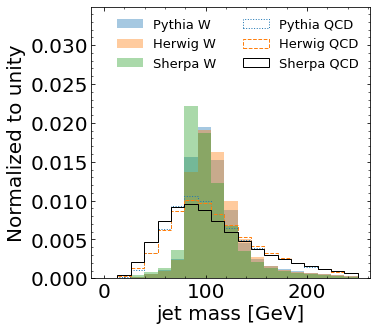

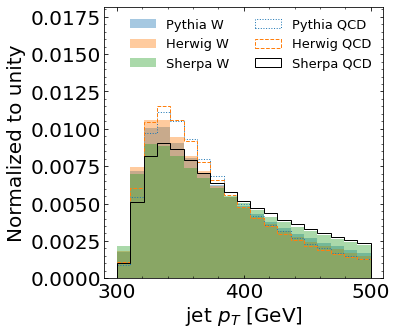

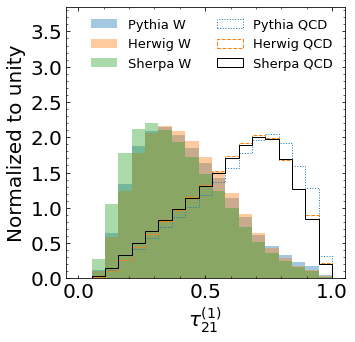

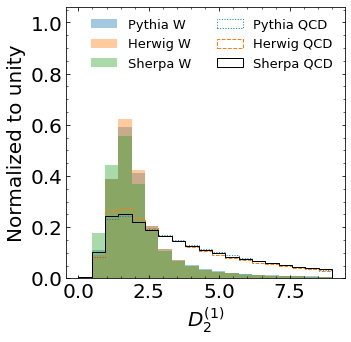

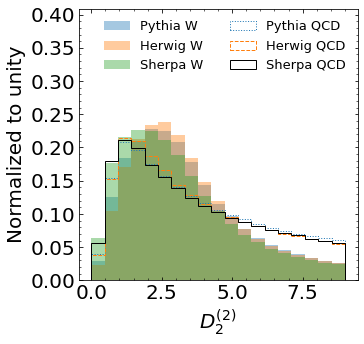

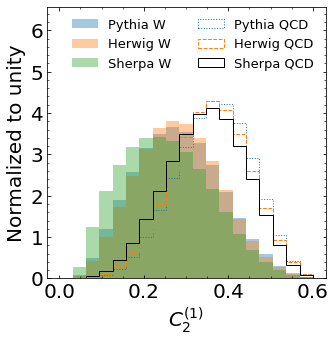

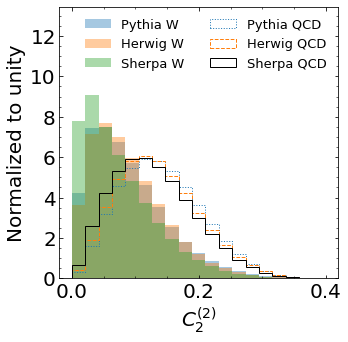

In [533]:
#MJ_0', 'PTJ_0', 't21_0', 'D21_0', 'D22_0' 'C21_0', 'C22_0

myranges = [[0,250],
           [300,500],
           [0,1],
           [0,9],
           [0,9],
           [0,0.6],
           [0,0.4]]
mynames = ["jet mass [GeV]",
          "jet $p_T$ [GeV]",
          r"$\tau_{21}^{(1)}$",
          "$D_{2}^{(1)}$",
          "$D_{2}^{(2)}$",
          "$C_{2}^{(1)}$",
          "$C_{2}^{(2)}$",]
for i in range(7):
    fig = plt.figure(figsize=(5, 5)) 
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    n,b,_=plt.hist(scaler.inverse_transform(X[Y==1])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),alpha=0.4,label="Pythia W",density=True)
    plt.hist(scaler.inverse_transform(X_h[Y_h==1])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),alpha=0.4,label="Herwig W",density=True)
    plt.hist(scaler.inverse_transform(X_s[Y_s==1])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),alpha=0.4,label="Sherpa W",density=True)
    
    plt.hist(scaler.inverse_transform(X[Y==0])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),histtype="step",density=True,color="tab:blue",ls=":",label="Pythia QCD")
    plt.hist(scaler.inverse_transform(X_h[Y_h==0])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),histtype="step",density=True,color="tab:orange",ls="--",label="Herwig QCD")
    plt.hist(scaler.inverse_transform(X_s[Y_s==0])[:,i],bins=np.linspace(myranges[i][0],myranges[i][1],20),histtype="step",density=True,color="black",label="Sherpa QCD")
    
    plt.xlabel(mynames[i],fontsize=20)
    plt.ylabel("Normalized to unity",fontsize=20)
    plt.legend(frameon=False,fontsize=13,ncol=2)
    plt.ylim([0,max(n)*1.8])
    
    plt.locator_params(axis='x', nbins=4)
    fig.savefig('boostedjets_features'+str(i)+'.pdf',bbox_inches='tight')

In [138]:
#Now, for the seconds example
!ls

Hadronization.ipynb  singletopLO.txt  singletopNLO.txt	wjetsLO.txt


In [157]:
myfiles = ["singletopLO.txt","wjetsLO.txt","singletopNLO.txt"]
njets = {}
events = {}
weights = {}
for file in myfiles:
    print("on file=",file)
    myoffset = 16
    if ("NLO" in file):
        myoffset = 2
    myfile = open(file)
    njets[file] = []
    events[file] = []
    weights[file] = []
    for line in myfile:
        wvec = []
        if ("NLO" in file):
             wvec = [float(line.split()[0])]
        else:
            wvec = [float(line.split()[0]),float(line.split()[1]),float(line.split()[2]),float(line.split()[3]),float(line.split()[4]),float(line.split()[5]),float(line.split()[6]),float(line.split()[7]),float(line.split()[8]),float(line.split()[9]),float(line.split()[10]),float(line.split()[11]),float(line.split()[12]),float(line.split()[13]),float(line.split()[14])]
        jets = []
        jet = []
        myi = 0
        for i in range(myoffset,len(line.split())):
            if (line.split()[i]=="M"):
                myi = i
                break
            jet+=[float(line.split()[i])]
            if (len(jet)==11):
                jets+=[jet]
                jet=[]
        for i in range(len(jets)):
            jets[i] = jets[i][1:5]
        muons = []
        muon = []
        for i in range(myi+1,len(line.split())):
            if (line.split()[i]=="E"):
                break
            muon+=[float(line.split()[i])]
            if (len(muon)==4):
                muons+=[muon]
                muon=[]
        njets[file]+=[len(jets)]
        if (len(jets) < 2 or len(muons)!=1):
            continue
        jets = np.array(jets)
        hT = np.sum(jets[:,0])
        events[file]+=[[muons[0][1],muons[0][2],muons[0][3],jets[0][0],jets[0][1],jets[0][2],jets[0][3],jets[1][0],jets[1][1],jets[1][2],jets[1][3],hT]]
        weights[file]+=[wvec]

on file= singletopLO.txt
on file= wjetsLO.txt
on file= singletopNLO.txt


In [158]:
for file in myfiles:
    njets[file] = np.array(njets[file])
    events[file] = np.array(events[file])
    weights[file] = np.array(weights[file])

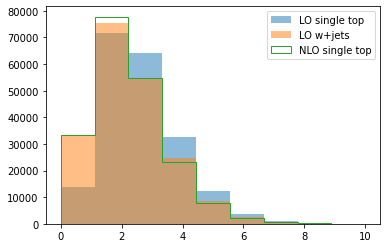

In [159]:
plt.hist(njets['singletopLO.txt'],bins=np.linspace(0,10,10),alpha=0.5,label="LO single top")
plt.hist(njets['wjetsLO.txt'],bins=np.linspace(0,10,10),alpha=0.5,label="LO w+jets")
plt.hist(njets['singletopNLO.txt'],bins=np.linspace(0,10,10),histtype="step",label="NLO single top")
plt.legend()

<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-204-fc29dfaf2ec2>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-i

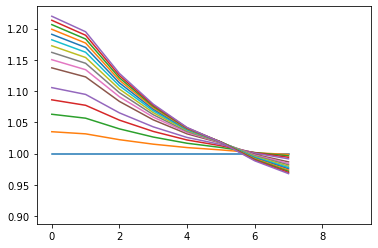

In [204]:
n0,b=np.histogram(events['singletopLO.txt'][:,0],weights=weights['singletopLO.txt'][:,0])

for i in range(15):
    n,b=np.histogram(events['singletopLO.txt'][:,0],weights=weights['singletopLO.txt'][:,i])
    plt.plot(n/n0)

<ipython-input-160-f2792fee7815>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(n/n0)
<ipython-input-160-f2792fee7815>:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(n/n0)
<ipyt

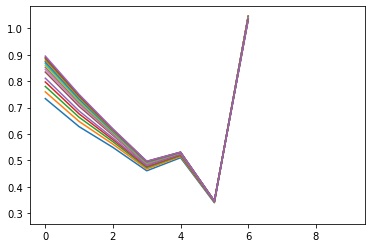

In [160]:
n0,b=np.histogram(events['singletopNLO.txt'][:,0],weights=weights['singletopNLO.txt'][:,0])

for i in range(15):
    n,b=np.histogram(events['singletopLO.txt'][:,0],weights=weights['singletopLO.txt'][:,i])
    plt.plot(n/n0)

In [161]:
n0,b=np.histogram(events['singletopNLO.txt'][:,0],weights=weights['singletopNLO.txt'][:,0])
n0,b=np.histogram(events['singletopNLO.txt'][:,0],weights=weights['singletopNLO.txt'][:,0])
n0,b=np.histogram(events['singletopNLO.txt'][:,0],weights=weights['singletopNLO.txt'][:,0])

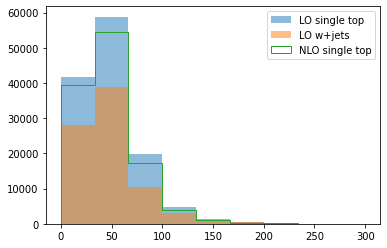

In [162]:
plt.hist(events['singletopLO.txt'][:,0],bins=np.linspace(0,300,10),alpha=0.5,label="LO single top")
plt.hist(events['wjetsLO.txt'][:,0],bins=np.linspace(0,300,10),alpha=0.5,label="LO w+jets")
plt.hist(events['singletopNLO.txt'][:,0],bins=np.linspace(0,300,10),histtype="step",label="NLO single top")
plt.legend()

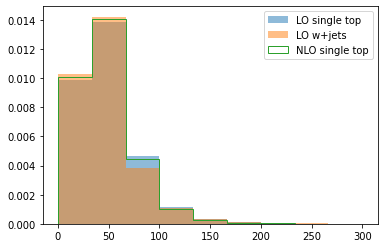

In [256]:
plt.hist(events['singletopLO.txt'][:,0],bins=np.linspace(0,300,10),alpha=0.5,label="LO single top",density=True)
plt.hist(events['wjetsLO.txt'][:,0],bins=np.linspace(0,300,10),alpha=0.5,label="LO w+jets",density=True)
plt.hist(events['singletopNLO.txt'][:,0],bins=np.linspace(0,300,10),histtype="step",label="NLO single top",density=True)
plt.legend()

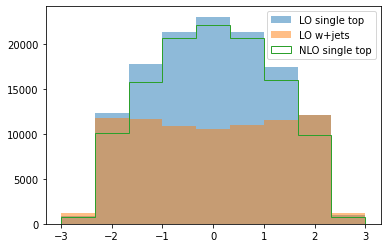

In [163]:
plt.hist(events['singletopLO.txt'][:,1],bins=np.linspace(-3,3,10),alpha=0.5,label="LO single top")
plt.hist(events['wjetsLO.txt'][:,1],bins=np.linspace(-3,3,10),alpha=0.5,label="LO w+jets")
plt.hist(events['singletopNLO.txt'][:,1],bins=np.linspace(-3,3,10),histtype="step",label="NLO single top")
plt.legend()

In [ ]:
#Now, let's try to pivot!

In [284]:
!ls

Hadronization.ipynb  singletopLO.txt   wjetsLO_ren.txt
singletopLO_ren.txt  singletopNLO.txt  wjetsLO.txt


In [165]:
np.shape(events['singletopLO.txt'])

(127142, 12)

In [240]:
X_st = np.concatenate([events['singletopLO.txt'],events['wjetsLO.txt']])
Y_st = np.concatenate([np.ones(len(events['singletopLO.txt'])),np.zeros(len(events['wjetsLO.txt']))])
W_st = np.concatenate([weights['singletopLO.txt'][:,5],weights['wjetsLO.txt'][:,5]])

scaler_st = StandardScaler()
scaler_st.fit(X_st)
X_st = scaler_st.transform(X_st)

X_train_st, X_test_st, Y_train_st, Y_test_st, W_train_st, W_test_st = train_test_split(X_st,Y_st,W_st, test_size=0.5)

Y_train_2_st = np.stack((Y_train_st, W_train_st), axis=1)
Y_test_2_st = np.stack((Y_test_st, W_test_st), axis=1)

###

X_st_nlo = np.concatenate([events['singletopNLO.txt'],events['wjetsLO.txt']])
Y_st_nlo = np.concatenate([np.ones(len(events['singletopNLO.txt'])),np.zeros(len(events['wjetsLO.txt']))])
W_st_nlo = np.concatenate([weights['singletopNLO.txt'][:,0],weights['wjetsLO.txt'][:,5]])

X_st_nlo = scaler_st.transform(X_st_nlo)

X_train_st_nlo, X_test_st_nlo, Y_train_st_nlo, Y_test_st_nlo, W_train_st_nlo, W_test_st_nlo = train_test_split(X_st_nlo,Y_st_nlo,W_st_nlo, test_size=0.5)

###

X_st_w = {}
Y_st_w = {}
W_st_w = {}

X_train_st_w = {}
X_test_st_w = {}

Y_train_st_w = {}
Y_test_st_w = {}

W_train_st_w = {}
W_test_st_w = {}

#0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2

for i in range(15):

    X_st_w[i] = np.concatenate([events['singletopLO.txt'],events['wjetsLO.txt']])
    Y_st_w[i] = np.concatenate([np.ones(len(events['singletopLO.txt'])),np.zeros(len(events['wjetsLO.txt']))])
    W_st_w[i] = np.concatenate([weights['singletopLO.txt'][:,i],weights['wjetsLO.txt'][:,i]])

    X_st_w[i] = scaler_st.transform(X_st_w[i])

    X_train_st_w[i], X_test_st_w[i], Y_train_st_w[i], Y_test_st_w[i], W_train_st_w[i], W_test_st_w[i] = train_test_split(X_st_w[i],Y_st_w[i],W_st_w[i], test_size=0.5)
    
#adversary
#Note: the nominal weight is weight[:,5]

X_st_a = np.concatenate([events['singletopLO.txt'],events['wjetsLO.txt']])
Y_st_a = np.concatenate([np.ones(len(events['singletopLO.txt'])),np.zeros(len(events['wjetsLO.txt']))])
W_st_a = np.concatenate([weights['singletopLO.txt'][:,0],weights['wjetsLO.txt'][:,0]])
Z_st_a = np.concatenate([0.5*np.ones(len(events['singletopLO.txt'])),0.5*np.ones(len(events['wjetsLO.txt']))])
for i in range(1,15):
    X_st_a = np.concatenate([X_st_a,events['singletopLO.txt'],events['wjetsLO.txt']])
    Y_st_a = np.concatenate([Y_st_a,np.ones(len(events['singletopLO.txt'])),np.zeros(len(events['wjetsLO.txt']))])
    W_st_a = np.concatenate([W_st_a,weights['singletopLO.txt'][:,i],weights['wjetsLO.txt'][:,i]])
    Z_st_a = np.concatenate([Z_st_a,(0.5+i*0.1)*np.ones(len(events['singletopLO.txt'])),(0.5+i*0.1)*np.ones(len(events['wjetsLO.txt']))])
    
X_st_a = scaler_st.transform(X_st_a)

X_train_st_a, X_test_st_a, Y_train_st_a, Y_test_st_a, W_train_st_a, W_test_st_a, Z_train_st_a, Z_test_st_a = train_test_split(X_st_a,Y_st_a,W_st_a,Z_st_a, test_size=0.5)

Y_train_2_st_a = np.stack((Y_train_st_a, W_train_st_a), axis=1)
Y_test_2_st_a = np.stack((Y_test_st_a, W_test_st_a), axis=1)

Z_train_2_st_a = np.stack((Z_train_st_a, W_train_st_a), axis=1)
Z_test_2_st_a = np.stack((Z_test_st_a, W_test_st_a), axis=1)

In [290]:
model_st = Sequential()
model_st.add(Dense(50, input_dim=12, activation='relu')) 
model_st.add(Dense(50, activation='relu'))
model_st.add(Dense(1, activation='sigmoid'))
opt = tf.keras.optimizers.Adam(learning_rate=2e-6)
model_st.compile(loss=weighted_binary_crossentropy, optimizer=opt, metrics=['accuracy'])

In [297]:
hist_st = model_st.fit(X_train_st, Y_train_2_st, epochs=100, batch_size=200,verbose = 1, validation_data=(X_test_st, Y_test_2_st))

Epoch 1/100
523/523 [==============================] - 3s 6ms/step - loss: 86.1453 - accuracy: 0.3430 - val_loss: 86.4527 - val_accuracy: 0.3421
Epoch 2/100
523/523 [==============================] - 3s 6ms/step - loss: 86.1313 - accuracy: 0.3431 - val_loss: 86.4399 - val_accuracy: 0.3421
Epoch 3/100
523/523 [==============================] - 3s 6ms/step - loss: 86.1179 - accuracy: 0.3431 - val_loss: 86.4274 - val_accuracy: 0.3421
Epoch 4/100
523/523 [==============================] - 3s 6ms/step - loss: 86.1042 - accuracy: 0.3431 - val_loss: 86.4150 - val_accuracy: 0.3421
Epoch 5/100
523/523 [==============================] - 3s 6ms/step - loss: 86.0907 - accuracy: 0.3431 - val_loss: 86.4027 - val_accuracy: 0.3422
Epoch 6/100
523/523 [==============================] - 3s 6ms/step - loss: 86.0773 - accuracy: 0.3432 - val_loss: 86.3906 - val_accuracy: 0.3422
Epoch 7/100
523/523 [==============================] - 3s 6ms/step - loss: 86.0641 - accuracy: 0.3432 - val_loss: 86.3786 - val_ac

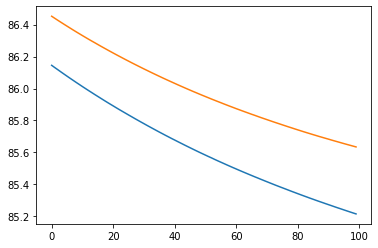

In [298]:
plt.plot(hist_st.history['loss'])
plt.plot(hist_st.history['val_loss'])

In [299]:
scores_st = model_st.predict(X_test_st,batch_size=1000)
scores_st_nlo = model_st.predict(X_test_st_nlo,batch_size=1000)
scores_st_w = {}
for i in range(15):
    scores_st_w[i] = model_st.predict(X_test_st_w[i],batch_size=1000)

(array([  388.,  1670.,  3067.,  4865.,  7269., 10104., 12298., 12197.,
         9293.,  2443.]),
 array([0.03325545, 0.12468273, 0.21611   , 0.3075373 , 0.39896455,
        0.49039185, 0.5818191 , 0.6732464 , 0.7646737 , 0.856101  ,
        0.94752824], dtype=float32),
 [<matplotlib.patches.Polygon at 0x7ff5a02541c0>])

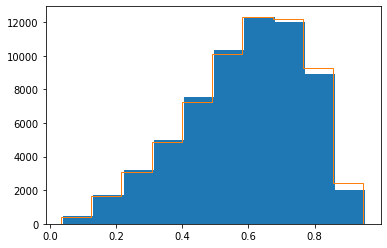

In [300]:
plt.hist(scores_st[Y_test_st==1])
plt.hist(scores_st_w[8][Y_test_st_w[8]==1],histtype="step")

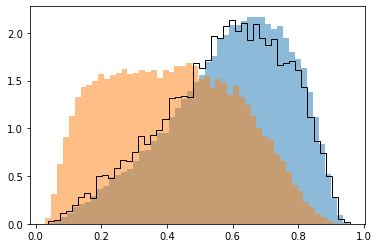

In [301]:
_,_,_=plt.hist(scores_st[Y_test_st==1],bins=50,alpha=0.5,weights=W_test_st[Y_test_st==1],density=True)
_,_,_=plt.hist(scores_st[Y_test_st==0],bins=50,alpha=0.5,weights=W_test_st[Y_test_st==0],density=True)
_,_,_=plt.hist(scores_st_nlo[Y_test_st_nlo==1],bins=50,histtype="step",color="black",weights=W_test_st_nlo[Y_test_st_nlo==1],density=True)

In [302]:
fpr_st, tpr_st, _ = roc_curve(Y_test_st, scores_st, sample_weight=W_test_st)
fpr_st_nlo, tpr_st_nlo, _ = roc_curve(Y_test_st_nlo, scores_st_nlo, sample_weight=W_test_st_nlo)

fpr_st_w = {}
tpr_st_w = {}
for i in range(15):
    fpr_st_w[i], tpr_st_w[i], _ = roc_curve(Y_test_st_w[i], scores_st_w[i], sample_weight=W_test_st_w[i])

<ipython-input-311-3dcdd6d7e115>:1: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st,1/fpr_st)
<ipython-input-311-3dcdd6d7e115>:2: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st_nlo,1/fpr_st_nlo)
<ipython-input-311-3dcdd6d7e115>:3: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st,1/tpr_st,color="black",ls=":")
<ipython-input-311-3dcdd6d7e115>:6: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st_w[i],1/fpr_st_w[i],ls=":")
<ipython-input-311-3dcdd6d7e115>:6: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st_w[i],1/fpr_st_w[i],ls=":")
<ipython-input-311-3dcdd6d7e115>:6: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st_w[i],1/fpr_st_w[i],ls=":")
<ipython-input-311-3dcdd6d7e115>:6: RuntimeWarning: divide by zero encountered in true_divide
  _=plt.plot(tpr_st_w[i],1/fpr_st_w[i],ls=":")
<ipython-input-311-3dcdd6d7e115>:6:

(0.0, 250.0)

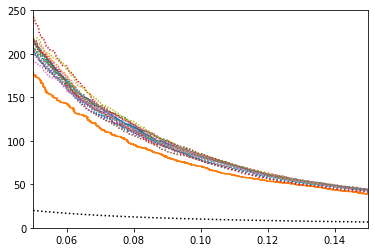

In [311]:
_=plt.plot(tpr_st,1/fpr_st)
_=plt.plot(tpr_st_nlo,1/fpr_st_nlo)
_=plt.plot(tpr_st,1/tpr_st,color="black",ls=":")

for i in range(15):
    _=plt.plot(tpr_st_w[i],1/fpr_st_w[i],ls=":")
plt.xlim([0.05,0.15])
plt.ylim([0,250])
#plt.yscale("log")

In [411]:
vals_nom = np.zeros([20,15])
for i in range(15):
    vals_nom[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w[i],1./fpr_st_w[i])
central_nom = np.interp(np.linspace(0.05,0.15,20),tpr_st_w[5],1./fpr_st_w[5])
nlo_nom = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo,1/fpr_st_nlo)

<ipython-input-411-9732967d6c20>:3: RuntimeWarning: divide by zero encountered in true_divide
  vals_nom[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w[i],1./fpr_st_w[i])
<ipython-input-411-9732967d6c20>:4: RuntimeWarning: divide by zero encountered in true_divide
  central_nom = np.interp(np.linspace(0.05,0.15,20),tpr_st_w[5],1./fpr_st_w[5])
<ipython-input-411-9732967d6c20>:5: RuntimeWarning: divide by zero encountered in true_divide
  nlo_nom = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo,1/fpr_st_nlo)


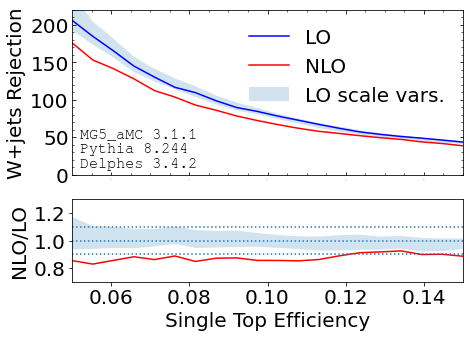

In [643]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)

plt.plot(np.linspace(0.05,0.15,20),central_nom,color="blue",label="LO")
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals_nom,axis=1),np.max(vals_nom,axis=1),alpha=0.2,label="LO scale vars.")
plt.plot(np.linspace(0.05,0.15,20),nlo_nom,color="red",label="NLO")

plt.xlim([0.05,0.15])
plt.ylim([0,220])
#plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("W+jets Rejection",fontsize=20)
plt.legend(frameon=False,fontsize=20)

hfont = {'fontname':'FreeMono'}
plt.text(0.052,10,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=15,**hfont)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals_nom,axis=1)/central_nom,np.max(vals_nom,axis=1)/central_nom,alpha=0.2)
plt.plot(np.linspace(0.05,0.15,20),nlo_nom/central_nom,color='red')
plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("NLO/LO",fontsize=20)
plt.xlim([0.05,0.15])
plt.ylim([0.7,1.3])
plt.axhline(1,ls=":")
plt.axhline(1.1,ls=":")
plt.axhline(0.9,ls=":")

fig.savefig('ROC_st_before.pdf',bbox_inches='tight')

In [329]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda = 10.

inputs_st = Input(shape=(12,))
inputs_label_st = Input(shape=(1,))

Dx_st = Dense(n_nodes_inv, activation="relu")(inputs_st)
for i in range(n_hidden_inv -1):
    Dx_st = Dense(n_nodes_inv, activation='relu')(Dx_st)
Dx_st = Dense(1, activation="sigmoid", name="Clf_st")(Dx_st)
inv_model_st = Model(inputs=inputs_st, outputs=Dx_st)

GRx_st = GradReverse()(Dx_st)
GRx_con_st = tf.keras.layers.concatenate([GRx_st,inputs_label_st])
Rx_st = Dense(n_nodes_inv_R, activation="relu")(GRx_con_st)
for i in range(n_hidden_inv_R -1):
    Rx_st = Dense(n_nodes_inv_R, activation='relu')(Rx_st)
#Rx = Dense(1, activation="sigmoid")(Rx)
Rx_st = Dense(1, activation="sigmoid", name="Adv_st")(Rx_st) #maybe should be linear and not sigmoid !??
GR_st = Model(inputs=[inputs_st,inputs_label_st], outputs=[Dx_st, Rx_st])

GR_st.compile(loss=[weighted_binary_crossentropy, weighted_mse], loss_weights=[1,hp_lambda], optimizer=opt) #rmsprop

In [330]:
n_epochs = 20
GRhist_st = GR_st.fit(x=[X_train_st_a,Y_train_st_a], y=[Y_train_2_st_a, Z_train_2_st_a], epochs=n_epochs, batch_size=200)

Epoch 1/20
7843/7843 [==============================] - 38s 5ms/step - loss: 988.7785 - Clf_st_loss: 106.5221 - Adv_st_loss: 88.2258
Epoch 2/20
7843/7843 [==============================] - 34s 4ms/step - loss: 663.7190 - Clf_st_loss: 156.1031 - Adv_st_loss: 50.7617
Epoch 3/20
7843/7843 [==============================] - 34s 4ms/step - loss: 541.3243 - Clf_st_loss: 181.0270 - Adv_st_loss: 36.0298
Epoch 4/20
7843/7843 [==============================] - 34s 4ms/step - loss: 464.2227 - Clf_st_loss: 122.0701 - Adv_st_loss: 34.2153
Epoch 5/20
7843/7843 [==============================] - 34s 4ms/step - loss: 440.2361 - Clf_st_loss: 98.6514 - Adv_st_loss: 34.1584
Epoch 6/20
7843/7843 [==============================] - 34s 4ms/step - loss: 436.6797 - Clf_st_loss: 95.8780 - Adv_st_loss: 34.0801
Epoch 7/20
7843/7843 [==============================] - 34s 4ms/step - loss: 435.8971 - Clf_st_loss: 94.5291 - Adv_st_loss: 34.1367
Epoch 8/20
7843/7843 [==============================] - 34s 4ms/step - l

In [331]:
scores_st_a = inv_model_st.predict(X_test_st,batch_size=1000)
scores_st_nlo_a = inv_model_st.predict(X_test_st_nlo,batch_size=1000)
scores_st_w_a = {}
for i in range(15):
    scores_st_w_a[i] = inv_model_st.predict(X_test_st_w[i],batch_size=1000)
    
fpr_st_a, tpr_st_a, _ = roc_curve(Y_test_st, scores_st_a, sample_weight=W_test_st)
fpr_st_nlo_a, tpr_st_nlo_a, _ = roc_curve(Y_test_st_nlo, scores_st_nlo_a, sample_weight=W_test_st_nlo)

fpr_st_w_a = {}
tpr_st_w_a = {}
for i in range(15):
    fpr_st_w_a[i], tpr_st_w_a[i], _ = roc_curve(Y_test_st_w[i], scores_st_w_a[i], sample_weight=W_test_st_w[i])

<ipython-input-335-152596a43caf>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_a,1/fpr_st_a,color="blue")
<ipython-input-335-152596a43caf>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_nlo_a,1/fpr_st_nlo_a,color="red")
<ipython-input-335-152596a43caf>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a[5],1/fpr_st_w_a[5],color='blue')
<ipython-input-335-152596a43caf>:10: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a[i],1/fpr_st_w_a[i],ls=":")
<ipython-input-335-152596a43caf>:10: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a[i],1/fpr_st_w_a[i],ls=":")
<ipython-input-335-152596a43caf>:10: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a[i],1/fpr_st_w_a[i],ls=":")
<ipython-input-335-152596a43caf>:10: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a[i],1/fpr_st_w_a[i

(0.0, 200.0)

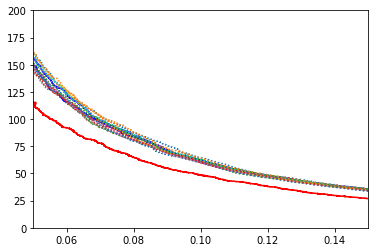

In [335]:
plt.plot(tpr_st_a,1/fpr_st_a,color="blue")
plt.plot(tpr_st_nlo_a,1/fpr_st_nlo_a,color="red")
plt.plot(tpr_st_w_a[5],1/fpr_st_w_a[5],color='blue')
#plt.plot(tpr_st_a,1/tpr_st_a,color="black",ls=":")

#_=plt.plot(tpr_st_w[5],1/fpr_st_w[5],color="red",ls=":")
#_=plt.plot(tpr_st_nlo,1/fpr_st_nlo,color="red",ls=":")

for i in range(1,15):
    plt.plot(tpr_st_w_a[i],1/fpr_st_w_a[i],ls=":")
plt.xlim([0.05,0.15])
plt.ylim([0,200])
#plt.yscale("log")

In [404]:
vals = np.zeros([20,15])
for i in range(15):
    vals[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a[i],1./fpr_st_w_a[i])
central = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a[5],1./fpr_st_w_a[5])
nlo = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a,1/fpr_st_nlo_a)

<ipython-input-404-68f4d3b5a6ac>:3: RuntimeWarning: divide by zero encountered in true_divide
  vals[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a[i],1./fpr_st_w_a[i])
<ipython-input-404-68f4d3b5a6ac>:4: RuntimeWarning: divide by zero encountered in true_divide
  central = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a[5],1./fpr_st_w_a[5])
<ipython-input-404-68f4d3b5a6ac>:5: RuntimeWarning: divide by zero encountered in true_divide
  nlo = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a,1/fpr_st_nlo_a)


<ipython-input-657-45644ab1b445>:13: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_nlo_a,1/fpr_st_nlo_a,color="red",label="NLO")


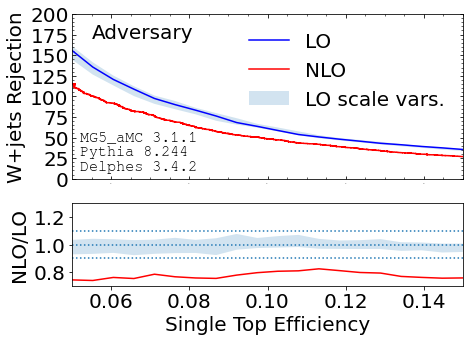

In [657]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
    
plt.plot(np.linspace(0.05,0.15,20),central,color="blue",label="LO")
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals,axis=1),np.max(vals,axis=1),alpha=0.2,label="LO scale vars.")
plt.plot(tpr_st_nlo_a,1/fpr_st_nlo_a,color="red",label="NLO")

plt.xlim([0.05,0.15])
plt.ylim([0,200])
plt.ylabel("W+jets Rejection",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.text(0.055,170,"Adversary",fontsize=20)

hfont = {'fontname':'FreeMono'}
plt.text(0.052,10,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=15,**hfont)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals_nom,axis=1)/central_nom,np.max(vals_nom,axis=1)/central_nom,alpha=0.1,color="tab:blue")
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals,axis=1)/central,np.max(vals,axis=1)/central,alpha=0.2) #,color="tab:blue")
plt.plot(np.linspace(0.05,0.15,20),nlo/central,color='red')
plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("NLO/LO",fontsize=20)
plt.xlim([0.05,0.15])
plt.ylim([0.7,1.3])
plt.axhline(1,ls=":")
plt.axhline(1.1,ls=":")
plt.axhline(0.9,ls=":")

fig.savefig('ROC_st_after.pdf',bbox_inches='tight')

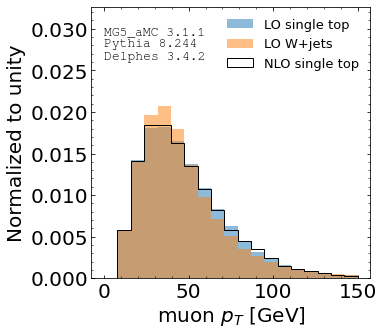

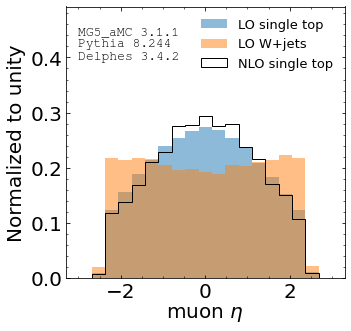

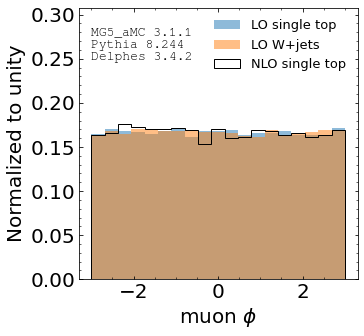

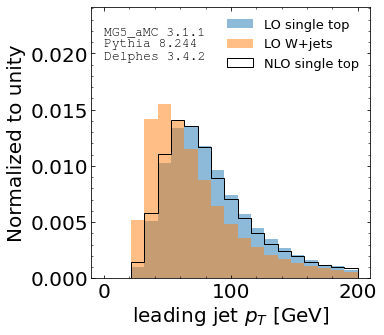

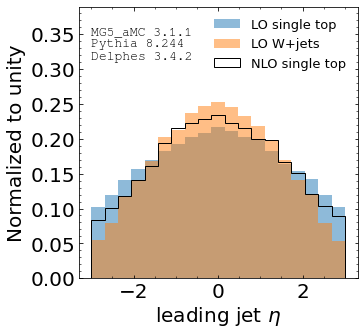

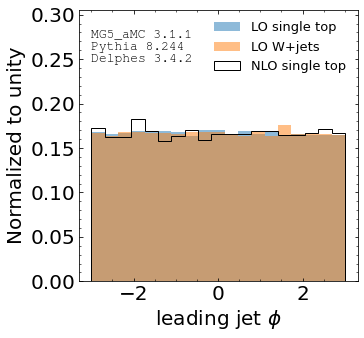

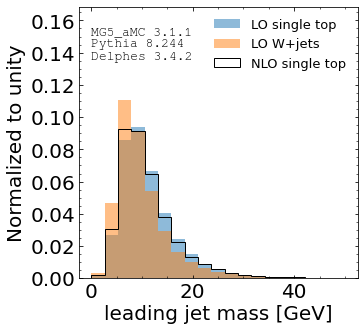

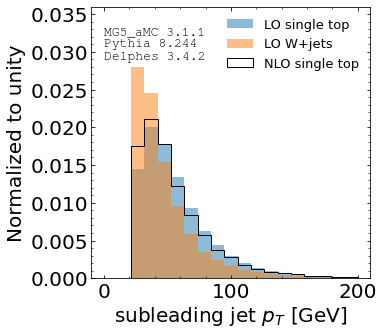

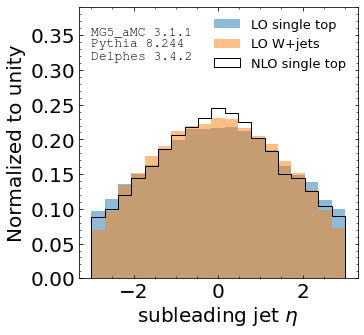

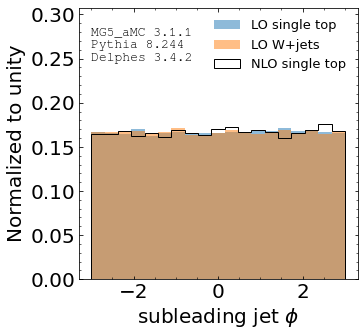

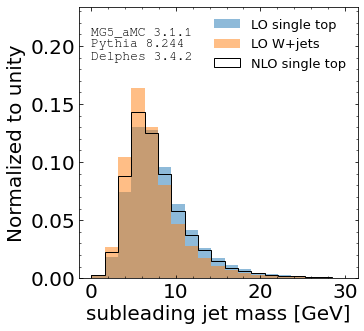

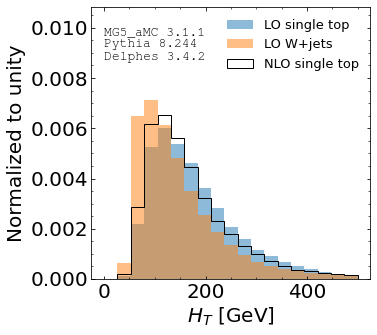

In [448]:
myranges = [[0,150],
           [-3,3],
           [-3,3],
           [0,200],
           [-3,3],
           [-3,3],
           [0,50],
           [0,200],
           [-3,3],
           [-3,3],
           [0,30],
           [0,500]]
mynames = ["muon $p_T$ [GeV]",
          "muon $\eta$",
          "muon $\phi$",
          "leading jet $p_T$ [GeV]",
          "leading jet $\eta$",
          "leading jet $\phi$",
          "leading jet mass [GeV]",
          "subleading jet $p_T$ [GeV]",
          "subleading jet $\eta$",
          "subleading jet $\phi$",
          "subleading jet mass [GeV]",
          "$H_T$ [GeV]"]
for i in range(12):
    fig = plt.figure(figsize=(5, 5)) 
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    n,b,_=plt.hist(events['singletopLO.txt'][:,i],weights=weights['singletopLO.txt'][:,5],bins=np.linspace(myranges[i][0],myranges[i][1],20),alpha=0.5,label="LO single top",density=True)
    plt.hist(events['wjetsLO.txt'][:,i],weights=weights['wjetsLO.txt'][:,5],bins=np.linspace(myranges[i][0],myranges[i][1],20),alpha=0.5,label="LO W+jets",density=True)
    plt.hist(events['singletopNLO.txt'][:,i],weights=weights['singletopNLO.txt'][:,0],bins=np.linspace(myranges[i][0],myranges[i][1],20),histtype="step",label="NLO single top",density=True,color="black")
    plt.xlabel(mynames[i],fontsize=20)
    plt.ylabel("Normalized to unity",fontsize=20)
    plt.legend(frameon=False,fontsize=13)
    plt.ylim([0,max(n)*1.8])
    
    plt.locator_params(axis='x', nbins=4)

    hfont = {'fontname':'FreeMono'}
    plt.text(myranges[i][0],max(n)*1.45,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    fig.savefig('singletop_features'+str(i)+'.pdf',bbox_inches='tight')

Text(0, 0.5, 'jet mass')

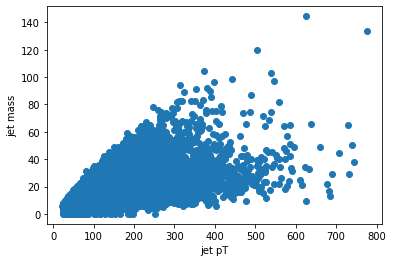

In [653]:
plt.scatter(events['singletopLO.txt'][:,3],events['singletopLO.txt'][:,6])
plt.xlabel("jet pT")
plt.ylabel("jet mass")

<ipython-input-650-652042b019fa>:46: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:47: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: Runtim

<ipython-input-650-652042b019fa>:46: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:47: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: Runtim

<ipython-input-650-652042b019fa>:46: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:47: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
<ipython-input-650-652042b019fa>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
<ipython-input-650-652042b019fa>:52: Runtim

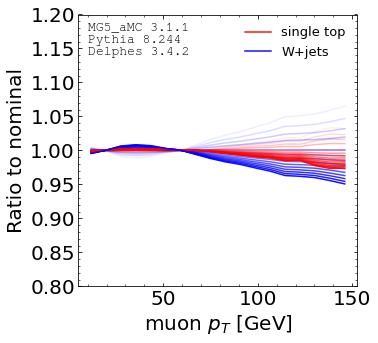

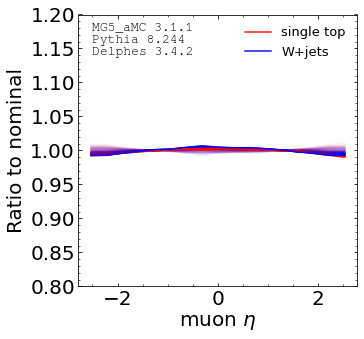

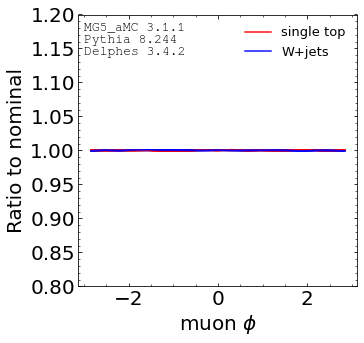

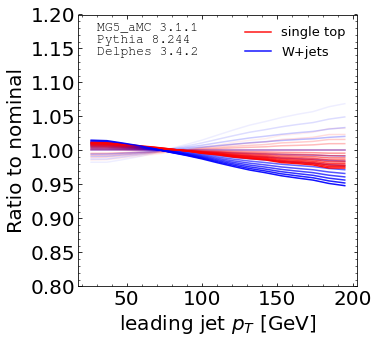

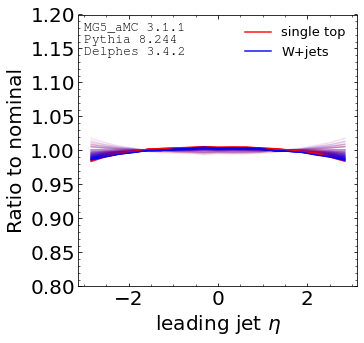

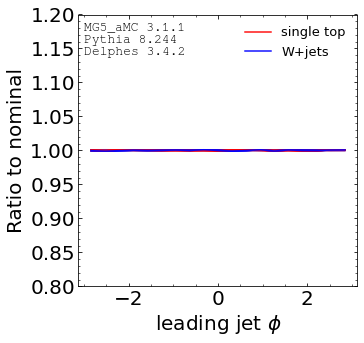

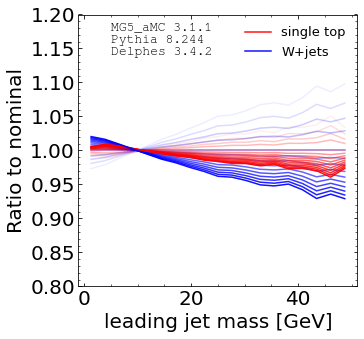

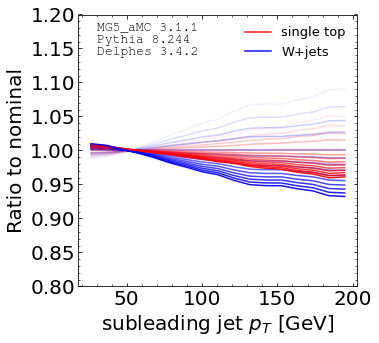

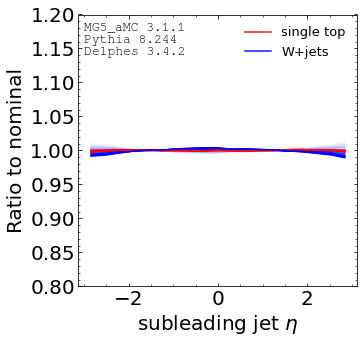

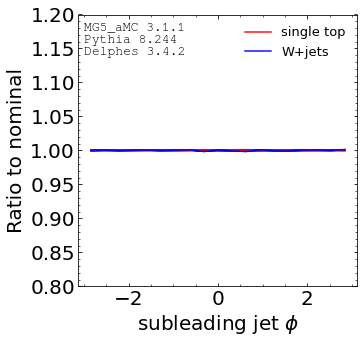

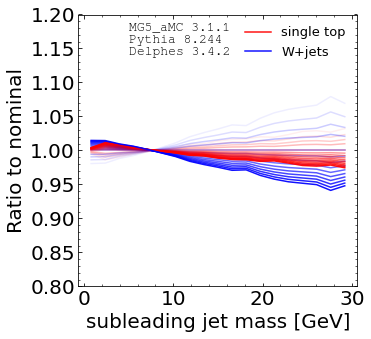

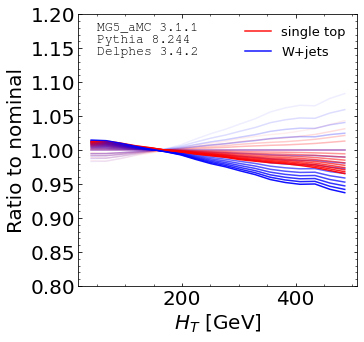

In [650]:
myranges = [[0,150],
           [-3,3],
           [-3,3],
           [0,200],
           [-3,3],
           [-3,3],
           [0,50],
           [0,200],
           [-3,3],
           [-3,3],
           [0,30],
           [0,500]]
mynames = ["muon $p_T$ [GeV]",
          "muon $\eta$",
          "muon $\phi$",
          "leading jet $p_T$ [GeV]",
          "leading jet $\eta$",
          "leading jet $\phi$",
          "leading jet mass [GeV]",
          "subleading jet $p_T$ [GeV]",
          "subleading jet $\eta$",
          "subleading jet $\phi$",
          "subleading jet mass [GeV]",
          "$H_T$ [GeV]"]
for i in range(12):
    fig = plt.figure(figsize=(5, 5)) 
    gs = gridspec.GridSpec(1, 1) 
    ax0 = plt.subplot(gs[0])
    ax0.yaxis.set_ticks_position('both')
    ax0.xaxis.set_ticks_position('both')
    ax0.tick_params(direction="in",which="both")
    ax0.minorticks_on()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

    n10,bb=np.histogram(events['singletopNLO.txt'][:,i],weights=weights['singletopNLO.txt'][:,0],bins=np.linspace(myranges[i][0],myranges[i][1],10),density=True)
    n00,_=np.histogram(events['singletopLO.txt'][:,i],weights=weights['singletopLO.txt'][:,5],bins=np.linspace(myranges[i][0],myranges[i][1],10),density=True)
    #plt.plot(0.5*(bb[0:-1]+bb[1:]),n10/n00,color="black")
    
    n0,b=np.histogram(events['singletopLO.txt'][:,i],weights=weights['singletopLO.txt'][:,5],bins=np.linspace(myranges[i][0],myranges[i][1],20),density=True)
    n0_w,b=np.histogram(events['wjetsLO.txt'][:,i],weights=weights['wjetsLO.txt'][:,5],bins=np.linspace(myranges[i][0],myranges[i][1],20),density=True)
    for ii in range(15):
        ni,b=np.histogram(events['singletopLO.txt'][:,i],weights=weights['singletopLO.txt'][:,ii],bins=np.linspace(myranges[i][0],myranges[i][1],20),density=True)
        ni_w,b=np.histogram(events['wjetsLO.txt'][:,i],weights=weights['wjetsLO.txt'][:,ii],bins=np.linspace(myranges[i][0],myranges[i][1],20),density=True)
        if (ii==0):
            plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
            plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
        elif (ii==14):
            plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",label="single top",alpha=ii/15.)
            plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",label="W+jets",alpha=ii/15.)
        else:
            plt.plot(0.5*(b[0:-1]+b[1:]),ni/n0,color="red",alpha=ii/15.)
            plt.plot(0.5*(b[0:-1]+b[1:]),ni_w/n0_w,color="blue",alpha=ii/15.)
    
    plt.xlabel(mynames[i],fontsize=20)
    plt.ylabel("Ratio to nominal",fontsize=20)
    plt.legend(frameon=False,fontsize=13,loc="upper right")
    plt.ylim([0.8,1.2])
    
    plt.locator_params(axis='x', nbins=4)

    hfont = {'fontname':'FreeMono'}
    if (i in [0]):
        plt.text(myranges[i][0]+10,1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    elif (i in [3,7]):
        plt.text(myranges[i][0]+30,1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    elif (i in [6,10]):
        plt.text(myranges[i][0]+5,1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    elif (i in [11]):
        plt.text(myranges[i][0]+50,1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    elif (i in [1]):
        plt.text(myranges[i][0]+0.5,1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    else:
        plt.text(myranges[i][0],1.14,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=13,**hfont)
    fig.savefig('singletop_variations'+str(i)+'.pdf',bbox_inches='tight')
    #break

In [550]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda = 10.

inputs_st_v2 = Input(shape=(12,))
inputs_label_st_v2 = Input(shape=(1,))

Dx_st_v2 = Dense(n_nodes_inv, activation="relu")(inputs_st_v2)
for i in range(n_hidden_inv -1):
    Dx_st_v2 = Dense(n_nodes_inv, activation='relu')(Dx_st_v2)
Dx_st_v2 = Dense(1, activation="sigmoid", name="Clf_st")(Dx_st_v2)
inv_model_st_v2 = Model(inputs=inputs_st_v2, outputs=Dx_st_v2)

GRx_st_v2 = GradReverse()(Dx_st_v2)
GRx_con_st_v2 = tf.keras.layers.concatenate([GRx_st_v2,inputs_label_st_v2])
Rx_st_v2 = Dense(n_nodes_inv_R, activation="relu")(GRx_con_st_v2)
for i in range(n_hidden_inv_R -1):
    Rx_st_v2 = Dense(n_nodes_inv_R, activation='relu')(Rx_st_v2)
#Rx = Dense(1, activation="sigmoid")(Rx)
Rx_st_v2 = Dense(1, activation="linear", name="Adv_st")(Rx_st_v2) #maybe should be linear and not sigmoid !??
GR_st_v2 = Model(inputs=[inputs_st_v2,inputs_label_st_v2], outputs=[Dx_st_v2, Rx_st_v2])

GR_st_v2.compile(loss=[weighted_binary_crossentropy, weighted_mse], loss_weights=[1,hp_lambda], optimizer=opt) #rmsprop

In [551]:
n_epochs = 20
GRhist_st_v2 = GR_st_v2.fit(x=[X_train_st_a,Y_train_st_a], y=[Y_train_2_st_a, Z_train_2_st_a], epochs=n_epochs, batch_size=200)

Epoch 1/20
7843/7843 [==============================] - 33s 4ms/step - loss: 1786.7334 - Clf_st_loss: 102.2935 - Adv_st_loss: 168.4440
Epoch 2/20
7843/7843 [==============================] - 32s 4ms/step - loss: 561.5963 - Clf_st_loss: 134.8913 - Adv_st_loss: 42.6705
Epoch 3/20
7843/7843 [==============================] - 32s 4ms/step - loss: 429.0928 - Clf_st_loss: 156.9795 - Adv_st_loss: 27.2114
Epoch 4/20
7843/7843 [==============================] - 32s 4ms/step - loss: 406.0849 - Clf_st_loss: 135.3740 - Adv_st_loss: 27.0710
Epoch 5/20
7843/7843 [==============================] - 32s 4ms/step - loss: 388.4529 - Clf_st_loss: 118.6381 - Adv_st_loss: 26.9815
Epoch 6/20
7843/7843 [==============================] - 32s 4ms/step - loss: 376.7287 - Clf_st_loss: 108.8843 - Adv_st_loss: 26.7844
Epoch 7/20
7843/7843 [==============================] - 32s 4ms/step - loss: 370.5792 - Clf_st_loss: 104.2394 - Adv_st_loss: 26.6340
Epoch 8/20
7843/7843 [==============================] - 32s 4ms/ste

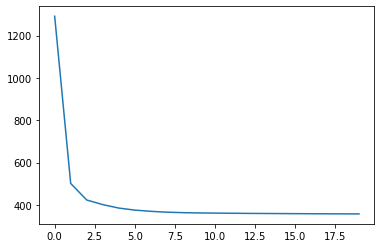

In [552]:
plt.plot(GRhist_st_v2.history['loss'])

In [553]:
scores_st_a_v2 = inv_model_st_v2.predict(X_test_st,batch_size=1000)
scores_st_nlo_a_v2 = inv_model_st_v2.predict(X_test_st_nlo,batch_size=1000)
scores_st_w_a_v2 = {}
for i in range(15):
    scores_st_w_a_v2[i] = inv_model_st_v2.predict(X_test_st_w[i],batch_size=1000)
    
fpr_st_a_v2, tpr_st_a_v2, _ = roc_curve(Y_test_st, scores_st_a_v2, sample_weight=W_test_st)
fpr_st_nlo_a_v2, tpr_st_nlo_a_v2, _ = roc_curve(Y_test_st_nlo, scores_st_nlo_a_v2, sample_weight=W_test_st_nlo)

fpr_st_w_a_v2 = {}
tpr_st_w_a_v2 = {}
for i in range(15):
    fpr_st_w_a_v2[i], tpr_st_w_a_v2[i], _ = roc_curve(Y_test_st_w[i], scores_st_w_a_v2[i], sample_weight=W_test_st_w[i])

<ipython-input-554-0ddaf3cc7601>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_a_v2,1/fpr_st_a_v2,color="blue")
<ipython-input-554-0ddaf3cc7601>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_nlo_a_v2,1/fpr_st_nlo_a_v2,color="red")
<ipython-input-554-0ddaf3cc7601>:3: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a_v2[5],1/fpr_st_w_a_v2[5],color='blue')
<ipython-input-554-0ddaf3cc7601>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a_v2[i],1/fpr_st_w_a_v2[i],ls=":")
<ipython-input-554-0ddaf3cc7601>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a_v2[i],1/fpr_st_w_a_v2[i],ls=":")
<ipython-input-554-0ddaf3cc7601>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(tpr_st_w_a_v2[i],1/fpr_st_w_a_v2[i],ls=":")
<ipython-input-554-0ddaf3cc7601>:6: RuntimeWarning: divide by zero encountered in true_divide
  plt.p

(0.0, 200.0)

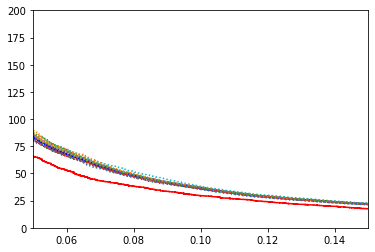

In [554]:
plt.plot(tpr_st_a_v2,1/fpr_st_a_v2,color="blue")
plt.plot(tpr_st_nlo_a_v2,1/fpr_st_nlo_a_v2,color="red")
plt.plot(tpr_st_w_a_v2[5],1/fpr_st_w_a_v2[5],color='blue')

for i in range(1,15):
    plt.plot(tpr_st_w_a_v2[i],1/fpr_st_w_a_v2[i],ls=":")
plt.xlim([0.05,0.15])
plt.ylim([0,200])

In [555]:
vals_v2 = np.zeros([20,15])
for i in range(15):
    vals_v2[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2[i],1./fpr_st_w_a_v2[i])
central_v2 = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2[5],1./fpr_st_w_a_v2[5])
nlo_v2 = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a_v2,1/fpr_st_nlo_a_v2)

<ipython-input-555-403771ceaa63>:3: RuntimeWarning: divide by zero encountered in true_divide
  vals_v2[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2[i],1./fpr_st_w_a_v2[i])
<ipython-input-555-403771ceaa63>:4: RuntimeWarning: divide by zero encountered in true_divide
  central_v2 = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2[5],1./fpr_st_w_a_v2[5])
<ipython-input-555-403771ceaa63>:5: RuntimeWarning: divide by zero encountered in true_divide
  nlo_v2 = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a_v2,1/fpr_st_nlo_a_v2)


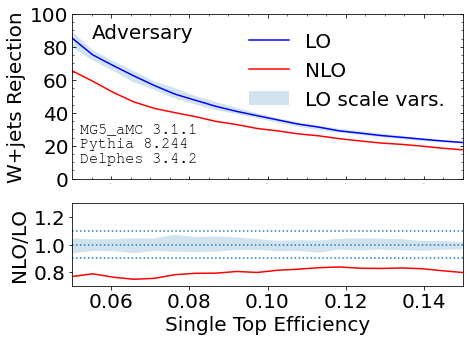

In [641]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)
    
plt.plot(np.linspace(0.05,0.15,20),central_v2,color="blue",label="LO")
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals_v2,axis=1),np.max(vals_v2,axis=1),alpha=0.2,label="LO scale vars.")
plt.plot(np.linspace(0.05,0.15,20),nlo_v2,color="red",label="NLO")

plt.xlim([0.05,0.15])
plt.ylim([0,100])
plt.ylabel("W+jets Rejection",fontsize=20)
plt.legend(frameon=False,fontsize=20)
plt.text(0.055,85,"Adversary",fontsize=20)

hfont = {'fontname':'FreeMono'}
plt.text(0.052,10,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=15,**hfont)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.fill_between(np.linspace(0.05,0.15,20),np.min(vals_v2,axis=1)/central_v2,np.max(vals_v2,axis=1)/central_v2,alpha=0.2)
plt.plot(np.linspace(0.05,0.15,20),nlo_v2/central_v2,color='red')
plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("NLO/LO",fontsize=20)
plt.xlim([0.05,0.15])
plt.ylim([0.7,1.3])
plt.axhline(1,ls=":")
plt.axhline(1.1,ls=":")
plt.axhline(0.9,ls=":")

fig.savefig('ROC_st_after_v2.pdf',bbox_inches='tight')

In [601]:
n_hidden_inv = 2; n_hidden_inv_R = 5
n_nodes_inv = 50; n_nodes_inv_R = 50
hp_lambda = 0.

inputs_st_v2_lam0 = Input(shape=(12,))
inputs_label_st_v2_lam0 = Input(shape=(1,))

Dx_st_v2_lam0 = Dense(n_nodes_inv, activation="relu")(inputs_st_v2_lam0)
for i in range(n_hidden_inv -1):
    Dx_st_v2_lam0 = Dense(n_nodes_inv, activation='relu')(Dx_st_v2_lam0)
Dx_st_v2_lam0 = Dense(1, activation="sigmoid", name="Clf_st")(Dx_st_v2_lam0)
inv_model_st_v2_lam0 = Model(inputs=inputs_st_v2_lam0, outputs=Dx_st_v2_lam0)

GRx_st_v2_lam0 = GradReverse()(Dx_st_v2_lam0)
GRx_con_st_v2_lam0 = tf.keras.layers.concatenate([GRx_st_v2_lam0,inputs_label_st_v2_lam0])
Rx_st_v2_lam0 = Dense(n_nodes_inv_R, activation="relu")(GRx_con_st_v2_lam0)
for i in range(n_hidden_inv_R -1):
    Rx_st_v2_lam0 = Dense(n_nodes_inv_R, activation='relu')(Rx_st_v2_lam0)
#Rx = Dense(1, activation="sigmoid")(Rx)
Rx_st_v2_lam0 = Dense(1, activation="linear", name="Adv_st")(Rx_st_v2_lam0) #maybe should be linear and not sigmoid !??
GR_st_v2_lam0 = Model(inputs=[inputs_st_v2_lam0,inputs_label_st_v2_lam0], outputs=[Dx_st_v2_lam0, Rx_st_v2_lam0])

GR_st_v2_lam0.compile(loss=[weighted_binary_crossentropy, weighted_mse], loss_weights=[1,hp_lambda], optimizer=opt) #rmsprop

In [612]:
n_epochs = 5
GRhist_st_v2_lam0 = GR_st_v2_lam0.fit(x=[X_train_st_a,Y_train_st_a], y=[Y_train_2_st_a, Z_train_2_st_a], epochs=n_epochs, batch_size=200)

Epoch 1/5
7843/7843 [==============================] - 32s 4ms/step - loss: 86.1781 - Clf_st_loss: 86.1781 - Adv_st_loss: 229.6412
Epoch 2/5
7843/7843 [==============================] - 32s 4ms/step - loss: 86.0990 - Clf_st_loss: 86.0990 - Adv_st_loss: 229.6336
Epoch 3/5
7843/7843 [==============================] - 32s 4ms/step - loss: 86.0265 - Clf_st_loss: 86.0265 - Adv_st_loss: 229.6314
Epoch 4/5
7843/7843 [==============================] - 32s 4ms/step - loss: 85.9593 - Clf_st_loss: 85.9593 - Adv_st_loss: 229.6263
Epoch 5/5
7843/7843 [==============================] - 32s 4ms/step - loss: 85.8965 - Clf_st_loss: 85.8965 - Adv_st_loss: 229.6273


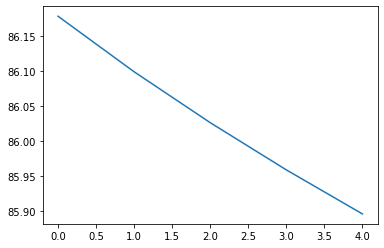

In [613]:
plt.plot(GRhist_st_v2_lam0.history['loss'])

In [614]:
scores_st_a_v2_lam0 = inv_model_st_v2_lam0.predict(X_test_st,batch_size=1000)
scores_st_nlo_a_v2_lam0 = inv_model_st_v2_lam0.predict(X_test_st_nlo,batch_size=1000)
scores_st_w_a_v2_lam0 = {}
for i in range(15):
    scores_st_w_a_v2_lam0[i] = inv_model_st_v2_lam0.predict(X_test_st_w[i],batch_size=1000)
    
fpr_st_a_v2_lam0, tpr_st_a_v2_lam0, _ = roc_curve(Y_test_st, scores_st_a_v2_lam0, sample_weight=W_test_st)
fpr_st_nlo_a_v2_lam0, tpr_st_nlo_a_v2_lam0, _ = roc_curve(Y_test_st_nlo, scores_st_nlo_a_v2_lam0, sample_weight=W_test_st_nlo)

fpr_st_w_a_v2_lam0 = {}
tpr_st_w_a_v2_lam0 = {}
for i in range(15):
    fpr_st_w_a_v2_lam0[i], tpr_st_w_a_v2_lam0[i], _ = roc_curve(Y_test_st_w[i], scores_st_w_a_v2_lam0[i], sample_weight=W_test_st_w[i])

In [615]:
vals_v2_lam0 = np.zeros([20,15])
for i in range(15):
    vals_v2_lam0[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2_lam0[i],1./fpr_st_w_a_v2_lam0[i])
central_v2_lam0 = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2_lam0[5],1./fpr_st_w_a_v2_lam0[5])
nlo_v2_lam0 = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a_v2_lam0,1/fpr_st_nlo_a_v2_lam0)

<ipython-input-615-f00837f45452>:3: RuntimeWarning: divide by zero encountered in true_divide
  vals_v2_lam0[:,i] = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2_lam0[i],1./fpr_st_w_a_v2_lam0[i])
<ipython-input-615-f00837f45452>:4: RuntimeWarning: divide by zero encountered in true_divide
  central_v2_lam0 = np.interp(np.linspace(0.05,0.15,20),tpr_st_w_a_v2_lam0[5],1./fpr_st_w_a_v2_lam0[5])
<ipython-input-615-f00837f45452>:5: RuntimeWarning: divide by zero encountered in true_divide
  nlo_v2_lam0 = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo_a_v2_lam0,1/fpr_st_nlo_a_v2_lam0)


In [623]:
nlo_v2_nominal = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo,1/fpr_st_nlo)

<ipython-input-623-94d8ae9608b0>:1: RuntimeWarning: divide by zero encountered in true_divide
  nlo_v2_nominal = np.interp(np.linspace(0.05,0.15,20),tpr_st_nlo,1/fpr_st_nlo)


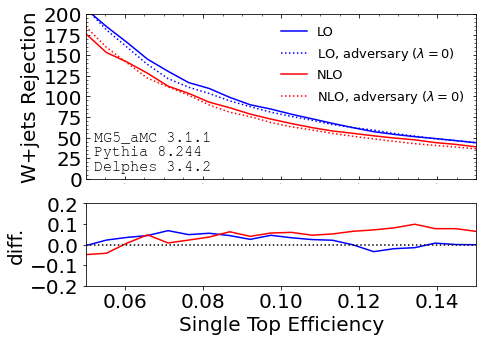

In [626]:
fig = plt.figure(figsize=(7, 5)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[2,1]) 
ax0 = plt.subplot(gs[0])
ax0.yaxis.set_ticks_position('both')
ax0.xaxis.set_ticks_position('both')
ax0.tick_params(direction="in",which="both")
ax0.minorticks_on()
plt.xticks(fontsize=0)
plt.yticks(fontsize=20)

plt.plot(np.linspace(0.05,0.15,20),central_nom,color="blue",label="LO")
plt.plot(np.linspace(0.05,0.15,20),central_v2_lam0,color="blue",label="LO, adversary ($\lambda=0$)",ls=":")
plt.plot(np.linspace(0.05,0.15,20),nlo_v2_nominal,color="red",label="NLO")
plt.plot(np.linspace(0.05,0.15,20),nlo_v2_lam0,color="red",label="NLO, adversary ($\lambda=0$)",ls=":")

plt.xlim([0.05,0.15])
plt.ylim([0,200])
#plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("W+jets Rejection",fontsize=20)
plt.legend(frameon=False,fontsize=13,ncol=1,loc="upper right")

hfont = {'fontname':'FreeMono'}
plt.text(0.052,10,"MG5_aMC 3.1.1\nPythia 8.244\nDelphes 3.4.2",fontsize=15,**hfont)

ax1 = plt.subplot(gs[1])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(np.linspace(0.05,0.15,20),(central_nom-central_v2_lam0)/central_nom,color='blue')
plt.plot(np.linspace(0.05,0.15,20),(nlo_v2_nominal-nlo_v2_lam0)/nlo_v2_nominal,color='red')
plt.xlabel("Single Top Efficiency",fontsize=20)
plt.ylabel("diff.",fontsize=20)
plt.xlim([0.05,0.15])
plt.ylim([-0.2,0.2])
plt.axhline(0,ls=":",color="black")
#plt.axhline(1.1,ls=":")
#plt.axhline(0.9,ls=":")

fig.savefig('ROC_st_before_lam0.pdf',bbox_inches='tight')

In [625]:
#Let's make sure to save everything we need to reproduce the plots!

In [637]:
#Fig. 2

tf.keras.models.save_model(inv_model,"inv_model")
tf.keras.models.save_model(model,"model")

#Fig. 5

#a

np.save("central_nom",central_nom)
np.save("nlo_nom",nlo_nom)
np.save("vals_nom",vals_nom)

tf.keras.models.save_model(model_st,"model_st")

#b

np.save("central_v2",central_v2)
np.save("nlo_v2",nlo_v2)
np.save("vals_v2",vals_v2)

tf.keras.models.save_model(inv_model_st_v2,"inv_model_st_v2")

#Fig. 6

np.save("p8_nom",p8_nom)
np.save("p8_adv",p8_adv)
np.save("p8_adv_lam0",p8_adv_lam0)

np.save("h7_nom",h7_nom)
np.save("h7_adv",h7_adv)
np.save("h7_adv_lam0",h7_adv_lam0)

np.save("s2_nom",s2_nom)
np.save("s2_adv",s2_adv)
np.save("s2_adv_lam0",s2_adv_lam0)

tf.keras.models.save_model(inv_model,"inv_model")
tf.keras.models.save_model(inv_model_lam0,"inv_model_lam0")

#Fig. 7

np.save("central_nom",central_nom)
np.save("central_v2_lam0",central_v2_lam0)
np.save("nlo_v2_nominal",nlo_v2_nominal)
np.save("nlo_v2_lam0",nlo_v2_lam0)

tf.keras.models.save_model(inv_model_st_v2_lam0,"model_st_lam0")
tf.keras.models.save_model(model_st,"model_st")

INFO:tensorflow:Assets written to: inv_model/assets
INFO:tensorflow:Assets written to: model/assets
INFO:tensorflow:Assets written to: model_st/assets
INFO:tensorflow:Assets written to: inv_model_st_v2/assets
INFO:tensorflow:Assets written to: inv_model/assets
INFO:tensorflow:Assets written to: inv_model_lam0/assets
INFO:tensorflow:Assets written to: model_st_lam0/assets
INFO:tensorflow:Assets written to: model_st/assets


In [644]:
!pwd

/home/bpnachman/disjets/PivotUncertainites
